# CUNY MSDS DATA618 - Quantative Finance

## Portfolio 

### Keeno Glanville
---------------------
You are a 37-year-old bond trader in a major investment firm. Your investment portfolio, largely holding high return equities is valued today at $6.2 M. You have just read Jamie Dimon's financial hurricane warning and decided to rebalance your portfolio.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats
from pandas_datareader import data
import yfinance as yf
from var import VaR
from pandas_datareader import data as pdr

d:\MSDS\msds_venv\Lib\site-packages\var\methods.py:22: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
d:\MSDS\msds_venv\Lib\site-packages\var\methods.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(cache=True)
d:\MSDS\msds_venv\Lib\site-packages\var\methods.py:87: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied

In [5]:
portfolio = pd.read_csv('https://raw.githubusercontent.com/kglan/MSDS/main/DATA618/portfolio.csv')
portfolio = portfolio[:-3]
portfolio.head(10)

,Asset,Ticker,Type,Subtype,Date,Price,Units,Amount
0,Apple Inc.,AAPL,Equity,Technology,12-Sep-23,$176.30,648,"$114,242"
1,Amazon.com Inc.,AMZN,Equity,E-commerce,12-Sep-23,$142.32,"1,000","$142,320"
2,Microsoft Corporation,MSFT,Equity,Technology,12-Sep-23,$331.77,500,"$165,885"
3,Alphabet Inc.,GOOGL,Equity,Technology,12-Sep-23,$135.19,800,"$108,152"
4,META,META,Equity,Technology,12-Sep-23,$324.40,500,"$162,200"
5,"Tesla, Inc.",TSLA,Equity,Automotive,12-Sep-23,$250.10,"1,599","$399,910"
6,NVIDIA Corporation,NVDA,Equity,Technology,12-Sep-23,$447.38,850,"$380,273"
7,Advanced Micro Devices,AMD,Equity,Technology,12-Sep-23,$104.20,"1,208","$125,874"
8,JPMorgan Chase & Co.,JPM,Equity,Financial Services,12-Sep-23,$146.34,995,"$145,608"
9,Johnson & Johnson,JNJ,Equity,Healthcare,12-Sep-23,$163.93,886,"$145,242"


In [6]:

#Calculate weights 
# Convert the 'Price' column to a numeric value
tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'META', 'TSLA', 'NVDA', 'AMD', 'JPM', 'JNJ', 'V', 'PG', 'JCI', 'GE', 'KO', 'VZ', 'BA', 'T', 'PFE', 'NFLX', 'BABA', 'INTC', 'DIS', 'XOM', 'F', 'GS', 'HD', 'IBM', 'SBUX', 'CSCO', 'LQD', 'HYG', 'IEF', 'BND', 'SHY', 'VCSH', 'BKLN', 'TIP', 'SCHP', 'TLT']

portfolio['Price'] = portfolio['Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate the weight for each asset
portfolio['Amount'] = portfolio['Amount'].str.replace('$', '').str.replace(',', '').astype(float)
portfolio['weight'] = portfolio['Amount'] / portfolio['Amount'].sum()
portfolio.head()

,Asset,Ticker,Type,Subtype,Date,Price,Units,Amount,weight
0,Apple Inc.,AAPL,Equity,Technology,12-Sep-23,176.30,648,114242.0,0.018426
1,Amazon.com Inc.,AMZN,Equity,E-commerce,12-Sep-23,142.32,"1,000",142320.0,0.022955
2,Microsoft Corporation,MSFT,Equity,Technology,12-Sep-23,331.77,500,165885.0,0.026756
3,Alphabet Inc.,GOOGL,Equity,Technology,12-Sep-23,135.19,800,108152.0,0.017444
4,META,META,Equity,Technology,12-Sep-23,324.40,500,162200.0,0.026161


In [7]:
weights = portfolio['Amount'] / portfolio['Amount'].sum()
w = {ticker: weight for ticker, weight in zip(tickers, weights)}
first_5_values = {k: v for k, v in list(w.items())[:5]}
first_5_values

{'AAPL': 0.018426129032258064,
 'AMZN': 0.02295483870967742,
 'MSFT': 0.026755645161290323,
 'GOOGL': 0.017443870967741935,
 'META': 0.026161290322580646}

In [8]:
yf.pdr_override()  # This sets Yahoo Finance as the data source for DataReader

# Date Range for portfolio
start_date = '2023-09-12'
end_date = '2023-10-08'


In [9]:
data = pdr.DataReader(tickers, start=start_date, end=end_date)


[*********************100%%**********************]  40 of 40 completed


In [10]:
data['Close']


,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,176.300003,105.309998,141.229996,210.649994,88.300003,21.209999,70.940002,...,105.400002,94.230003,267.480011,247.300003,75.300003,34.040001,117.489998
2023-09-13,174.210007,107.709999,144.850006,208.399994,87.639999,21.230000,71.050003,...,105.540001,94.209999,271.299988,247.830002,75.389999,33.860001,116.440002
2023-09-14,175.740005,106.629997,144.720001,209.050003,88.000000,21.250000,70.930000,...,105.370003,93.529999,276.040009,241.500000,75.370003,34.040001,118.519997
2023-09-15,175.009995,101.489998,140.389999,208.110001,87.070000,21.270000,70.790001,...,105.110001,92.959999,274.390015,241.070007,75.339996,33.790001,116.699997
2023-09-18,177.970001,102.370003,139.979996,205.119995,87.019997,21.120001,70.860001,...,105.330002,93.489998,265.279999,244.660004,75.360001,33.529999,117.639999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,173.750000,103.269997,129.460007,187.830002,86.529999,20.940001,69.110001,...,102.919998,86.930000,251.600006,231.270004,74.769997,31.760000,115.629997
2023-10-03,172.399994,100.080002,124.720001,188.919998,84.540001,20.870001,68.550003,...,102.190002,85.059998,246.529999,228.809998,74.570000,31.980000,115.830002
2023-10-04,173.660004,104.070000,127.000000,186.729996,84.080002,20.900000,69.000000,...,102.639999,86.260002,261.160004,231.220001,74.739998,31.540001,111.500000


In [11]:
pivoted = data['Close']
pivoted

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,176.300003,105.309998,141.229996,210.649994,88.300003,21.209999,70.940002,...,105.400002,94.230003,267.480011,247.300003,75.300003,34.040001,117.489998
2023-09-13,174.210007,107.709999,144.850006,208.399994,87.639999,21.230000,71.050003,...,105.540001,94.209999,271.299988,247.830002,75.389999,33.860001,116.440002
2023-09-14,175.740005,106.629997,144.720001,209.050003,88.000000,21.250000,70.930000,...,105.370003,93.529999,276.040009,241.500000,75.370003,34.040001,118.519997
2023-09-15,175.009995,101.489998,140.389999,208.110001,87.070000,21.270000,70.790001,...,105.110001,92.959999,274.390015,241.070007,75.339996,33.790001,116.699997
2023-09-18,177.970001,102.370003,139.979996,205.119995,87.019997,21.120001,70.860001,...,105.330002,93.489998,265.279999,244.660004,75.360001,33.529999,117.639999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,173.750000,103.269997,129.460007,187.830002,86.529999,20.940001,69.110001,...,102.919998,86.930000,251.600006,231.270004,74.769997,31.760000,115.629997
2023-10-03,172.399994,100.080002,124.720001,188.919998,84.540001,20.870001,68.550003,...,102.190002,85.059998,246.529999,228.809998,74.570000,31.980000,115.830002
2023-10-04,173.660004,104.070000,127.000000,186.729996,84.080002,20.900000,69.000000,...,102.639999,86.260002,261.160004,231.220001,74.739998,31.540001,111.500000


# Portfolio Variance
A measuree of dispursion around an expected value

$$\sigma^2(R_p) = w_1w_1\sigma^2(R_1) + w_1w_2COV(R_1,R_2) + w_2w_2\sigma^2(R_2) + w_2w_1COV(R_1,R_2)$$
$$\sigma^2(R_p) = \sum_{i=1}^n\sum_{j=1}^nw_iw_jCOV(R_i, R_j)$$

In [12]:
# Individual Asset Variance
returns =pivoted.pct_change()
var_ret=returns.var()
portfolio['Variance'] = var_ret.reindex(portfolio['Ticker']).values
var_ret

AAPL    0.000139
AMD     0.000739
AMZN    0.000465
BA      0.000093
BABA    0.000311
          ...   
TSLA    0.000564
V       0.000127
VCSH    0.000003
VZ      0.000107
XOM     0.000262
Length: 40, dtype: float64

In [13]:
# Individual Standard Deviation/Volatility

sd_ret = np.sqrt(var_ret)
portfolio['Volatility'] = sd_ret.reindex(portfolio['Ticker']).values
sd_ret

AAPL    0.011770
AMD     0.027188
AMZN    0.021552
BA      0.009657
BABA    0.017640
          ...   
TSLA    0.023747
V       0.011290
VCSH    0.001827
VZ      0.010367
XOM     0.016201
Length: 40, dtype: float64

# Portfolio Variance with Correlation and Covariance
It is nice to try and get an understanding of the individual stock however we see that we want to get an understanding of the stock but we need to understand how our portfolio factors in

In [14]:
cov_matrix= pivoted.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
AAPL,1.392551e-04,0.000119,0.000143,1.540456e-05,0.000098,-8.360488e-07,7.449752e-07,...,0.000003,-0.000001,0.000060,0.000061,4.485845e-07,-3.578723e-05,-0.000028
AMD,1.186462e-04,0.000738,0.000467,-4.645339e-05,0.000172,1.885027e-05,4.472464e-05,...,0.000051,0.000126,0.000327,0.000184,1.830379e-05,-1.054586e-04,-0.000015
AMZN,1.427507e-04,0.000467,0.000474,1.007037e-05,0.000164,2.079474e-05,2.084145e-05,...,0.000021,0.000065,0.000274,0.000129,7.159772e-06,-8.093012e-05,-0.000038
BA,1.540456e-05,-0.000046,0.000010,9.466031e-05,0.000026,6.713480e-06,-1.310963e-05,...,-0.000017,-0.000038,0.000002,-0.000034,-3.634870e-06,-8.794174e-07,0.000033
BABA,9.765578e-05,0.000172,0.000164,2.593565e-05,0.000304,1.392162e-05,2.519784e-05,...,0.000023,0.000070,-0.000063,0.000030,8.942813e-06,-5.376972e-05,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSLA,5.970674e-05,0.000327,0.000274,1.698414e-06,-0.000063,3.187250e-05,2.704691e-05,...,0.000020,0.000056,0.000559,0.000061,1.031188e-05,-2.768587e-05,-0.000163
V,6.067480e-05,0.000184,0.000129,-3.353747e-05,0.000030,-7.935432e-07,1.709186e-05,...,0.000018,0.000054,0.000061,0.000129,5.380404e-06,-3.538631e-05,-0.000067
VCSH,4.485845e-07,0.000018,0.000007,-3.634870e-06,0.000009,1.380811e-06,7.106566e-06,...,0.000006,0.000015,0.000010,0.000005,3.344563e-06,5.606641e-06,-0.000007
VZ,-3.578723e-05,-0.000105,-0.000081,-8.794174e-07,-0.000054,-1.450024e-06,9.690354e-06,...,0.000006,0.000017,-0.000028,-0.000035,5.606641e-06,1.094497e-04,0.000023


In [15]:
# Portfolio Correlation Matrix
cov_matrix.mul(w, axis=0).mul(w,axis=1)

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
AAPL,4.728021e-08,4.438459e-08,6.037911e-08,6.654321e-09,4.223234e-08,-3.851633e-10,3.426638e-10,...,1.244552e-09,-6.708951e-10,7.096236e-08,2.622111e-08,2.069365e-10,-1.549372e-08,-1.200306e-08
AMD,4.438459e-08,3.043440e-07,2.178229e-07,-2.210966e-08,8.180606e-08,9.568441e-09,2.266645e-08,...,2.596030e-08,6.405217e-08,4.284249e-07,8.784708e-08,9.303452e-09,-5.030599e-08,-7.317971e-09
AMZN,6.037911e-08,2.178229e-07,2.497847e-07,5.419262e-09,8.821233e-08,1.193458e-08,1.194248e-08,...,1.230652e-08,3.729463e-08,4.053176e-07,6.942078e-08,4.114644e-09,-4.364935e-08,-2.039453e-08
BA,6.654321e-09,-2.210966e-08,5.419262e-09,5.202459e-08,1.427022e-08,3.935023e-09,-7.671900e-09,...,-9.910661e-09,-2.219517e-08,2.568234e-09,-1.843993e-08,-2.133379e-09,-4.844052e-10,1.815447e-08
BABA,4.223234e-08,8.180606e-08,8.821233e-08,1.427022e-08,1.675302e-07,8.169249e-09,1.476280e-08,...,1.333670e-08,4.129236e-08,-9.516067e-08,1.640488e-08,5.254677e-09,-2.965133e-08,8.204646e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSLA,7.096236e-08,4.284249e-07,4.053176e-07,2.568234e-09,-9.516067e-08,5.140034e-08,4.354923e-08,...,3.162733e-08,8.979181e-08,2.325009e-06,9.243122e-08,1.665203e-08,-4.195871e-08,-2.467924e-07
V,2.622111e-08,8.784708e-08,6.942078e-08,-1.843993e-08,1.640488e-08,-4.653271e-10,1.000669e-08,...,1.074798e-08,3.191089e-08,9.243122e-08,7.080128e-08,3.159237e-09,-1.950012e-08,-3.677545e-08
VCSH,2.069365e-10,9.303452e-09,4.114644e-09,-2.133379e-09,5.254677e-09,8.643152e-10,4.441308e-09,...,3.844919e-09,9.507179e-09,1.665203e-08,3.159237e-09,2.096317e-09,3.298032e-09,-4.098470e-09
VZ,-1.549372e-08,-5.030599e-08,-4.364935e-08,-4.844052e-10,-2.965133e-08,-8.518201e-10,5.683623e-09,...,3.729970e-09,9.796171e-09,-4.195871e-08,-1.950012e-08,3.298032e-09,6.042285e-08,1.290132e-08


In [16]:
p_var= cov_matrix.mul(w, axis=0).mul(w,axis=1).sum().sum()
p_var

3.9464468852000945e-05

# Portfolio Standard Deviation
$$\sigma(R_p) = \sqrt{\sigma^2(R_p)}$$

In [17]:
# Portfolio Standard Deviation
p_sd= np.sqrt(p_var)
p_sd

0.00628207520266997

In [18]:
annual_p_sd= p_sd*np.sqrt(250)
annual_p_sd

0.09932833036450495

# Portfolio Expected Return
In order to work with Expected Returns we must work with annual values

In [19]:
a_start='2014-01-01'
a_end = '2023-10-08'
a_data = pdr.DataReader(tickers, start=a_start, end=a_end)
a_data = a_data['Close']

[**********            20%%                      ]  8 of 40 completed

[*********************100%%**********************]  40 of 40 completed


In [20]:
df= a_data.resample('Y').last().pct_change()
df

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.046385,0.074906,1.177831,0.112402,-0.218107,-0.067832,-0.019546,...,-0.020802,-0.042408,0.079133,0.183066,-0.008037,-0.011971,-0.156842
2016-12-31,0.100323,2.951220,0.109456,0.076700,0.080473,0.042857,0.000371,...,0.031820,-0.012025,-0.109662,0.006061,0.004811,0.154911,0.157922
2017-12-31,0.461147,-0.093474,0.559564,0.894335,0.963672,-0.013699,0.009655,...,0.008041,0.064887,0.457017,0.461420,-0.000882,-0.008430,-0.073344
2018-12-31,-0.067896,0.795720,0.284317,0.093554,-0.205069,-0.054688,-0.028932,...,-0.040060,-0.042172,0.068894,0.157165,-0.017150,0.062158,-0.184720
2019-12-31,0.861608,1.484291,0.230277,0.010109,0.547385,0.047750,0.058705,...,0.064469,0.114970,0.257001,0.424132,0.039646,0.092138,0.023317
2020-12-31,0.807458,0.999782,0.762561,-0.342890,0.097265,-0.023663,0.051634,...,0.095050,0.164231,7.434370,0.164077,0.027397,-0.043160,-0.409286
2021-12-31,0.338232,0.569076,0.023768,-0.059516,-0.489580,-0.008079,-0.039007,...,0.012143,-0.060483,0.497556,-0.009235,-0.023904,-0.115574,0.484473
2022-12-31,-0.268289,-0.549896,-0.496152,-0.053795,-0.258439,-0.071041,-0.152330,...,-0.176161,-0.328160,-0.650315,-0.041299,-0.074698,-0.241724,0.802582


In [21]:
e_r = df.mean()
portfolio['Expected Return'] = e_r.reindex(portfolio['Ticker']).values

cash_index = portfolio[portfolio['Ticker'] == 'Cash'].index[0]
portfolio.at[cash_index, 'Expected Return'] = 0
portfolio.at[cash_index, 'Variance'] = 0
portfolio.at[cash_index, 'Volatility'] = 0

e_r


AAPL    0.283582
AMD     0.765259
AMZN    0.352773
BA      0.079397
BABA    0.054951
          ...   
TSLA    1.016559
V       0.164077
VCSH   -0.006489
VZ     -0.036518
XOM     0.068414
Length: 40, dtype: float64

In [22]:
# Portfolio Expected Return
p_e_r=(e_r* pd.Series(w)).sum()
p_e_r

0.19834317471147678

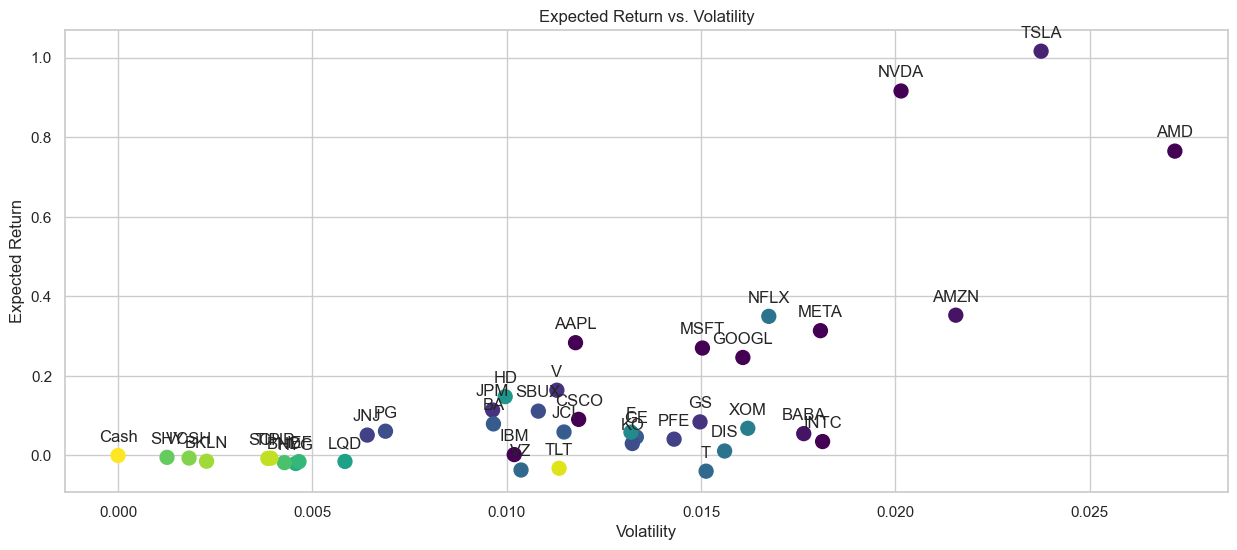

In [23]:
expected_return = portfolio['Expected Return']
volatility = portfolio['Volatility']
tickerz = portfolio['Ticker']
# Create a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(volatility, expected_return, c=portfolio['Subtype'].factorize()[0], cmap='viridis', marker='o', s=100)


# Label the points with the asset ticker or name
for i, ticker in enumerate(tickerz):
    plt.annotate(ticker, (volatility[i], expected_return[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Expected Return vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.grid(True)

# Show the plot
plt.show()

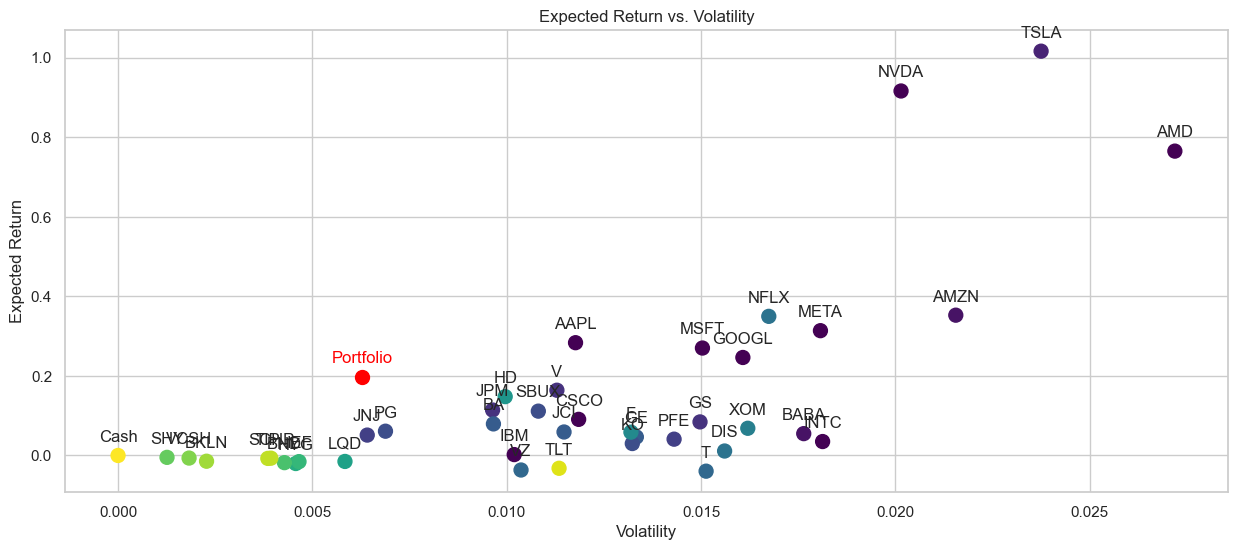

In [24]:
expected_return = portfolio['Expected Return']
volatility = portfolio['Volatility']
tickerz = portfolio['Ticker']
# Create a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(volatility, expected_return, c=portfolio['Subtype'].factorize()[0], cmap='viridis', marker='o', s=100)


# Label the points with the asset ticker or name
for i, ticker in enumerate(tickerz):
    plt.annotate(ticker, (volatility[i], expected_return[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Expected Return vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.grid(True)


plt.scatter(p_sd, p_e_r, color='red', marker='o', s=100)
plt.annotate("Portfolio", (p_sd, p_e_r), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

# Show the plot
plt.show()

# Sharpe Ratio
$$Sharpe Ratio = \frac{E(R_i)-rf}{\sigma_i}$$

In [25]:
# Risk free rate utilizing US treasuery yield -> 5.47%
rf=0.0547

In [26]:
portfolio['Sharpe'] = portfolio['Expected Return'].sub(rf).div(portfolio['Volatility'])
portfolio.head()

,Asset,Ticker,Type,Subtype,Date,Price,Units,Amount,weight,Variance,Volatility,Expected Return,Sharpe
0,Apple Inc.,AAPL,Equity,Technology,12-Sep-23,176.30,648,114242.0,0.018426,0.000139,0.011770,0.283582,19.447044
1,Amazon.com Inc.,AMZN,Equity,E-commerce,12-Sep-23,142.32,"1,000",142320.0,0.022955,0.000465,0.021552,0.352773,13.830197
2,Microsoft Corporation,MSFT,Equity,Technology,12-Sep-23,331.77,500,165885.0,0.026756,0.000226,0.015034,0.270134,14.329551
3,Alphabet Inc.,GOOGL,Equity,Technology,12-Sep-23,135.19,800,108152.0,0.017444,0.000258,0.016074,0.246406,11.926131
4,META,META,Equity,Technology,12-Sep-23,324.40,500,162200.0,0.026161,0.000327,0.018070,0.313804,14.338685


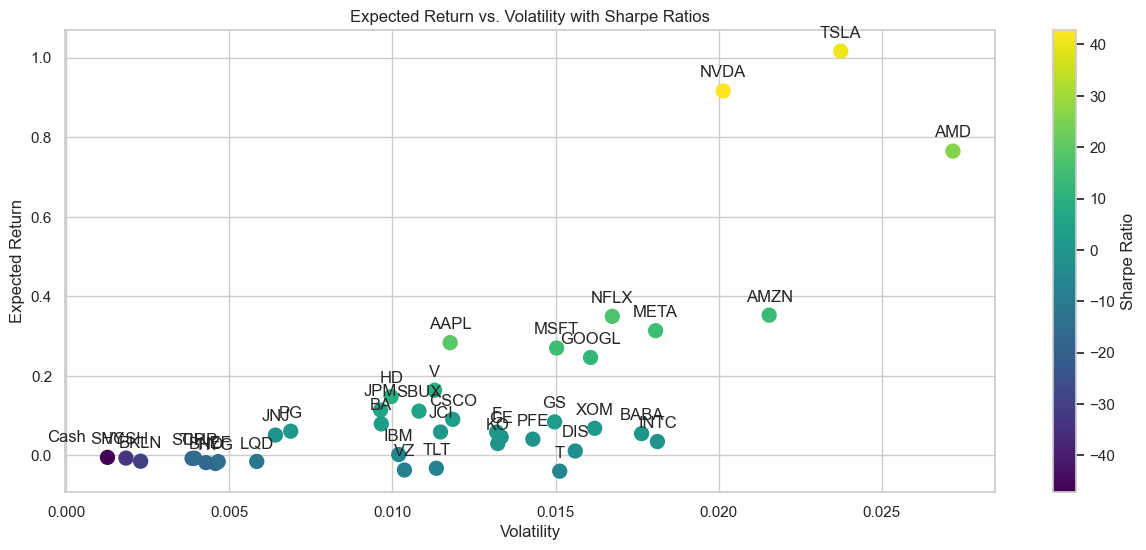

In [27]:

# Create a scatter plot of Sharpe Ratios
plt.figure(figsize=(15, 6))
plt.scatter(portfolio['Volatility'], portfolio['Expected Return'], c=portfolio['Sharpe'], cmap='viridis', s=100)
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Expected Return vs. Volatility with Sharpe Ratios')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)

# Label points with the asset ticker
for i, ticker in enumerate(portfolio['Ticker']):
    plt.annotate(ticker, (portfolio['Volatility'][i], portfolio['Expected Return'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

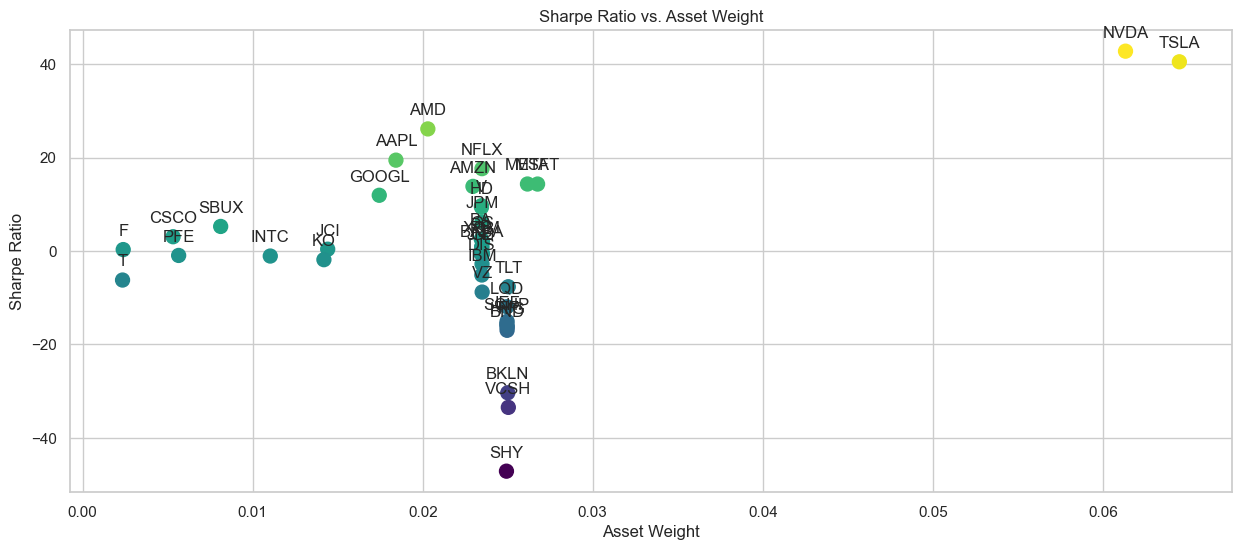

In [28]:
# Create a scatter plot of Sharpe Ratios vs. Asset Weights
plt.figure(figsize=(15, 6))
plt.scatter(portfolio['weight'], portfolio['Sharpe'], c=portfolio['Sharpe'],cmap='viridis', s=100)
plt.xlabel('Asset Weight')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio vs. Asset Weight')
plt.grid(True)

# Label points with the asset ticker
for i, ticker in enumerate(portfolio['Ticker']):
    plt.annotate(ticker, (portfolio['weight'][i], portfolio['Sharpe'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

# Volume Weighted Average Price (VWAP)

In [29]:
vwap_high =  data['High']
vwap_high

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,180.130005,106.739998,143.000000,212.259995,89.959999,21.209999,70.959999,...,105.459999,94.239998,278.390015,247.759995,75.349998,34.180000,117.669998
2023-09-13,177.300003,108.739998,144.979996,212.179993,88.290001,21.250000,71.120003,...,105.669998,94.529999,274.980011,250.059998,75.410004,34.299999,117.959999
2023-09-14,176.100006,109.150002,145.860001,210.440002,88.599998,21.260000,71.139999,...,105.629997,94.209999,276.709991,245.539993,75.489998,34.380001,118.660004
2023-09-15,176.500000,106.760002,143.570007,209.830002,88.220001,21.270000,70.919998,...,105.300003,93.480003,278.980011,244.100006,75.379997,34.169998,118.510002
2023-09-18,179.380005,102.989998,141.750000,207.910004,87.169998,21.129999,70.879997,...,105.349998,93.529999,271.440002,245.229996,75.379997,33.970001,118.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,174.300003,103.709999,130.470001,192.440002,87.105003,20.959999,69.370003,...,103.360001,87.930000,254.279999,231.369995,74.870003,32.470001,117.790001
2023-10-03,173.630005,103.290001,128.520004,192.490005,85.000000,20.930000,69.059998,...,102.820000,86.650002,250.020004,231.750000,74.769997,32.009998,116.440002
2023-10-04,174.210007,104.400002,127.360001,190.630005,84.540001,20.900000,69.029999,...,102.680000,86.309998,261.859985,231.699997,74.760002,31.969999,114.089996


In [30]:
vwap_low = data['Low']
vwap_low

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,174.820007,103.180000,140.610001,208.580002,88.180000,21.180000,70.849998,...,105.330002,93.580002,266.600006,246.009995,75.290001,33.799999,115.269997
2023-09-13,173.979996,104.830002,140.869995,207.750000,87.382004,21.200001,70.860001,...,105.400002,93.820000,268.100006,246.610001,75.300003,33.509998,115.900002
2023-09-14,173.580002,106.220001,142.949997,208.100006,87.440002,21.230000,70.910004,...,105.279999,93.400002,270.420013,238.750000,75.370003,33.939999,117.330002
2023-09-15,173.820007,101.279999,140.089996,206.880005,86.820000,21.230000,70.769997,...,105.070000,92.959999,271.000000,240.029999,75.300003,33.660000,116.500000
2023-09-18,176.169998,99.449997,139.220001,204.979996,85.394997,21.080000,70.669998,...,105.050003,92.820000,263.760010,240.770004,75.309998,33.520000,116.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,170.929993,101.699997,126.540001,186.929993,85.889999,20.920000,69.070000,...,102.860001,86.709999,242.619995,228.770004,74.760002,31.730000,114.550003
2023-10-03,170.820007,99.169998,124.250000,188.199997,83.949997,20.860001,68.529999,...,102.150002,84.889999,244.449997,227.779999,74.519997,31.610001,115.029999
2023-10-04,170.970001,100.339996,125.680000,184.339996,83.650002,20.850000,68.660004,...,102.300003,85.370003,247.600006,228.880005,74.570000,31.400000,110.500000


In [31]:
vwap_open= data['Open']

In [32]:
vwap_close = data['Close']
vwap_close

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,176.300003,105.309998,141.229996,210.649994,88.300003,21.209999,70.940002,...,105.400002,94.230003,267.480011,247.300003,75.300003,34.040001,117.489998
2023-09-13,174.210007,107.709999,144.850006,208.399994,87.639999,21.230000,71.050003,...,105.540001,94.209999,271.299988,247.830002,75.389999,33.860001,116.440002
2023-09-14,175.740005,106.629997,144.720001,209.050003,88.000000,21.250000,70.930000,...,105.370003,93.529999,276.040009,241.500000,75.370003,34.040001,118.519997
2023-09-15,175.009995,101.489998,140.389999,208.110001,87.070000,21.270000,70.790001,...,105.110001,92.959999,274.390015,241.070007,75.339996,33.790001,116.699997
2023-09-18,177.970001,102.370003,139.979996,205.119995,87.019997,21.120001,70.860001,...,105.330002,93.489998,265.279999,244.660004,75.360001,33.529999,117.639999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,173.750000,103.269997,129.460007,187.830002,86.529999,20.940001,69.110001,...,102.919998,86.930000,251.600006,231.270004,74.769997,31.760000,115.629997
2023-10-03,172.399994,100.080002,124.720001,188.919998,84.540001,20.870001,68.550003,...,102.190002,85.059998,246.529999,228.809998,74.570000,31.980000,115.830002
2023-10-04,173.660004,104.070000,127.000000,186.729996,84.080002,20.900000,69.000000,...,102.639999,86.260002,261.160004,231.220001,74.739998,31.540001,111.500000


In [33]:
vwap_vol = data['Volume']
vwap_vol

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,90370200,44413600,42668500,3256500,10262500,4604300,4246300,...,1589300,20034300,135999900,3499600,2133600,15784400,20145800
2023-09-13,84267900,44702300,60465200,3538100,10634900,7533900,6142500,...,2328400,23332300,111673700,5657000,2441300,21027900,13472800
2023-09-14,60895800,45920600,64033600,3974800,8643100,8411300,5227300,...,1817900,27800600,107709800,12000000,2095800,26570100,15210700
2023-09-15,109205100,71017600,102861700,4668500,10130900,6860400,4946100,...,1822200,25636800,133422800,13051300,3918000,38188200,34545100
2023-09-18,67257600,49061300,42823500,4299200,9291600,5753600,5882500,...,1521400,17963400,101543300,4771600,1700200,16233700,14045300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,52164500,45118600,48029700,5244700,8209800,11681000,6719800,...,6662900,44704300,123810400,5175200,6653000,24722600,14395000
2023-10-03,49594600,48117000,51565000,7285500,11448800,10179100,8099500,...,5004600,71362600,101985300,5585700,8718700,21389400,13297100
2023-10-04,53020300,51023200,44203900,7419800,8904700,6360800,7915900,...,2644600,56281600,129721600,5430900,5736100,23694100,19622200


In [34]:
vwap_typ = (vwap_high + vwap_low + vwap_close)/3
vwap_typ

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,177.083338,105.076665,141.613332,210.496663,88.813334,21.199999,70.916667,...,105.396667,94.016668,270.823344,247.023331,75.313334,34.006667,116.809998
2023-09-13,175.163335,107.093333,143.566666,209.443329,87.770668,21.226667,71.010002,...,105.536667,94.186666,271.460002,248.166667,75.366669,33.889999,116.766668
2023-09-14,175.140004,107.333333,144.510000,209.196671,88.013334,21.246667,70.993334,...,105.426666,93.713333,274.390004,241.929998,75.410001,34.120000,118.170001
2023-09-15,175.110001,103.176666,141.350001,208.273336,87.370000,21.256667,70.826665,...,105.160001,93.133334,274.790009,241.733337,75.339999,33.873333,117.236666
2023-09-18,177.840001,101.603333,140.316666,206.003332,86.528330,21.110000,70.803332,...,105.243334,93.279999,266.826670,243.553335,75.349998,33.673333,117.526665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,172.993332,102.893331,128.823336,189.066666,86.508334,20.940000,69.183334,...,103.046666,87.190000,249.500000,230.470001,74.800001,31.986667,115.990000
2023-10-03,172.283335,100.846667,125.830002,189.870000,84.496666,20.886667,68.713333,...,102.386668,85.533333,247.000000,229.446665,74.619998,31.866666,115.766668
2023-10-04,172.946671,102.936666,126.680000,187.233332,84.090001,20.883333,68.896667,...,102.540001,85.980001,256.873332,230.600001,74.690000,31.636667,112.029999


In [35]:
vwap_money_flow = vwap_typ * vwap_vol
vwap_money_flow

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,1.600306e+10,4.666833e+09,6.042428e+09,6.854824e+08,9.114468e+08,9.761116e+07,3.011334e+08,...,1.675069e+08,1.883558e+09,3.683195e+10,8.644828e+08,1.606885e+08,5.367748e+08,2.353231e+09
2023-09-13,1.476065e+10,4.787318e+09,8.680787e+09,7.410314e+08,9.334323e+08,1.599196e+08,4.361789e+08,...,2.457316e+08,2.197592e+09,3.031494e+10,1.403879e+09,1.839926e+08,7.126355e+08,1.573174e+09
2023-09-14,1.066529e+10,4.928811e+09,9.253496e+09,8.315149e+08,7.607080e+08,1.787121e+08,3.711035e+08,...,1.916551e+08,2.605287e+09,2.955449e+10,2.903160e+09,1.580443e+08,9.065718e+08,1.797448e+09
2023-09-15,1.912291e+10,7.327359e+09,1.453950e+10,9.723241e+08,8.851367e+08,1.458292e+08,3.503158e+08,...,1.916226e+08,2.387641e+09,3.666325e+10,3.154934e+09,2.951821e+08,1.293562e+09,4.049952e+09
2023-09-18,1.196109e+10,4.984792e+09,6.008851e+09,8.856495e+08,8.039866e+08,1.214585e+08,4.165006e+08,...,1.601172e+08,1.675626e+09,2.709446e+10,1.162139e+09,1.281101e+08,5.466428e+08,1.650697e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,9.024111e+09,4.642403e+09,6.187346e+09,9.915979e+08,7.102161e+08,2.446001e+08,4.648982e+08,...,6.865896e+08,3.897768e+09,3.089069e+10,1.192728e+09,4.976444e+08,7.907936e+08,1.669676e+09
2023-10-03,8.544323e+09,4.852439e+09,6.488424e+09,1.383298e+09,9.673854e+08,2.126075e+08,5.565436e+08,...,5.124043e+08,6.103881e+09,2.519037e+10,1.281620e+09,6.505894e+08,6.816089e+08,1.539361e+09
2023-10-04,9.169684e+09,5.252158e+09,5.599750e+09,1.389234e+09,7.487962e+08,1.328347e+08,5.453791e+08,...,2.711773e+08,4.839092e+09,3.332202e+10,1.252366e+09,4.284293e+08,7.496023e+08,2.198275e+09


In [36]:
vwap_cumulative_money_flow = vwap_money_flow.cumsum()
vwap_cumulative_volume = vwap_vol.cumsum()


In [37]:
vwap = vwap_cumulative_money_flow / vwap_cumulative_volume
vwap

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
Date,,,,,,,,,,,,,,,
2023-09-12,177.083338,105.076665,141.613332,210.496663,88.813334,21.199999,70.916667,...,105.396667,94.016668,270.823344,247.023331,75.313334,34.006667,116.809998
2023-09-13,176.156882,106.088266,142.758532,209.948169,88.282711,21.216551,70.971852,...,105.479873,94.108131,271.110407,247.729690,75.341795,33.940024,116.792633
2023-09-14,175.893975,106.511664,143.429433,209.670804,88.203895,21.228878,70.979043,...,105.463009,93.953908,272.104389,244.440111,75.363224,34.015471,117.221694
2023-09-15,175.645630,105.362240,142.637319,209.248202,87.990943,21.235833,70.942390,...,105.389953,93.736594,272.837446,243.407399,75.354630,33.962030,117.227897
2023-09-18,176.003857,104.639364,142.319666,208.541394,87.713386,21.214002,70.911457,...,105.365384,93.665127,271.803560,243.425263,75.353989,33.922247,117.270972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,174.766533,101.297347,134.108246,199.874689,86.908679,21.060212,70.219267,...,104.250312,90.488635,257.887507,238.182760,75.169184,33.295129,117.280108
2023-10-03,174.646918,101.270996,133.660272,198.884568,86.743051,21.049989,70.119852,...,104.048802,89.913360,257.296275,237.701490,75.086107,33.207543,117.202668
2023-10-04,174.563649,101.368239,133.350816,197.817763,86.608539,21.044072,70.045716,...,103.967253,89.583434,257.268948,237.340451,75.050253,33.107632,116.839511


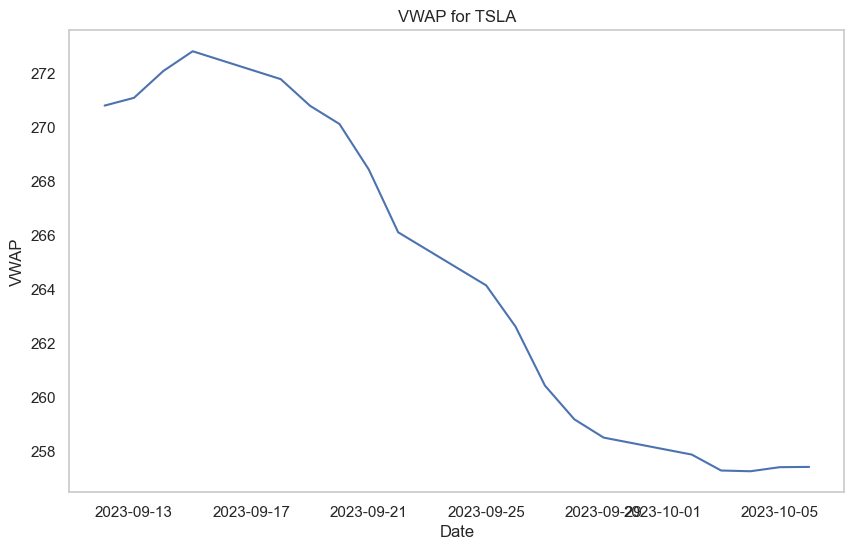

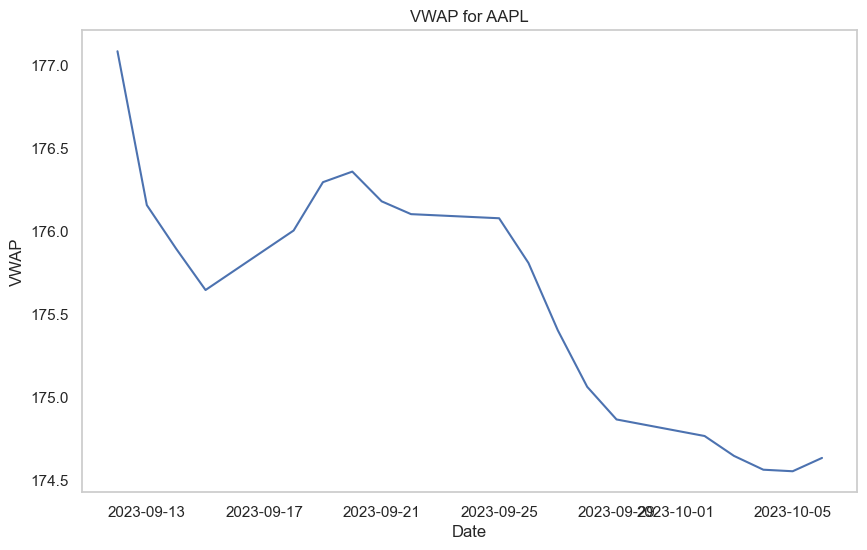

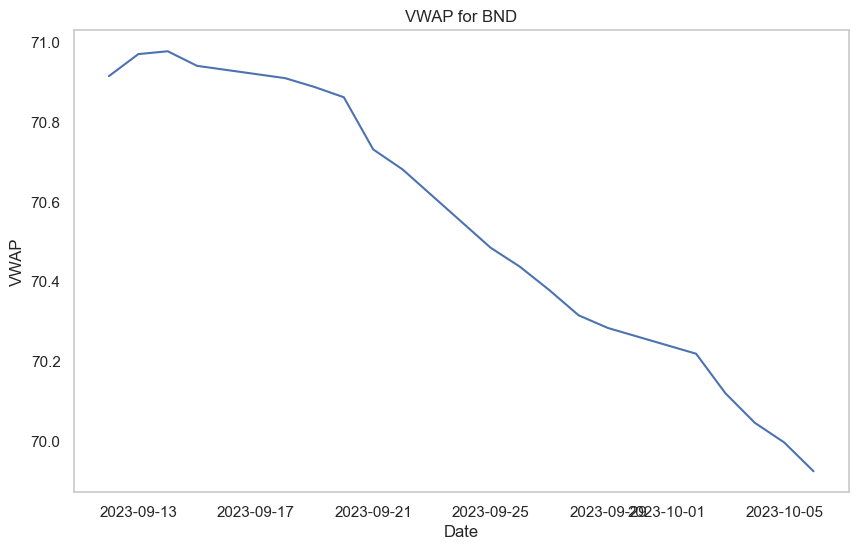

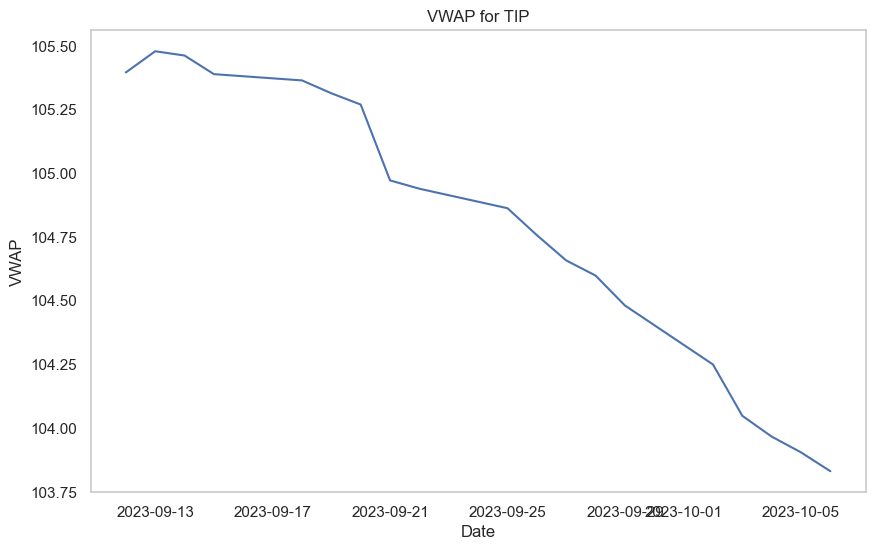

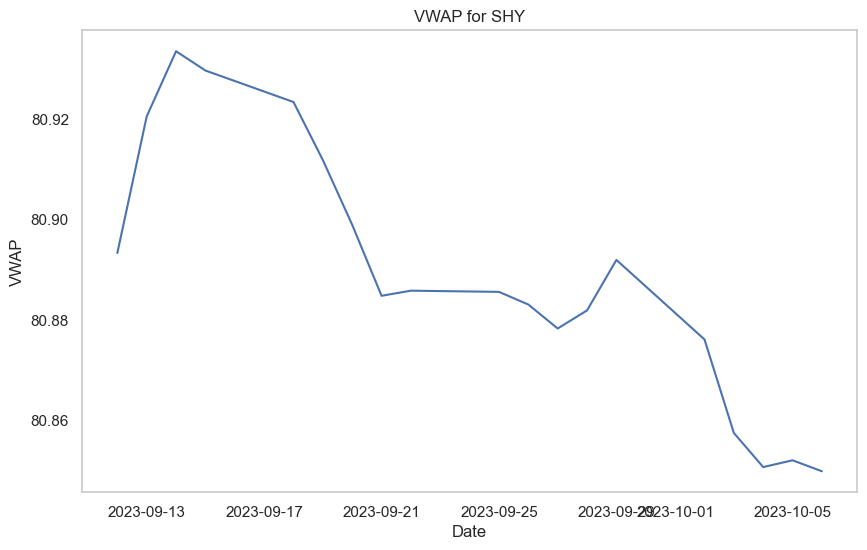

In [38]:
# Select the stocks you want to plot (TSLA, AAPL, BND, and TIP)
selected_stocks = ['TSLA', 'AAPL', 'BND', 'TIP', 'SHY']

# Create individual line charts for each selected stock
for stock in selected_stocks:
    plt.figure(figsize=(10, 6))
    plt.plot(vwap.index, vwap[stock])
    plt.xlabel('Date')
    plt.ylabel('VWAP')
    plt.title(f'VWAP for {stock}')
    plt.grid()
    plt.show()


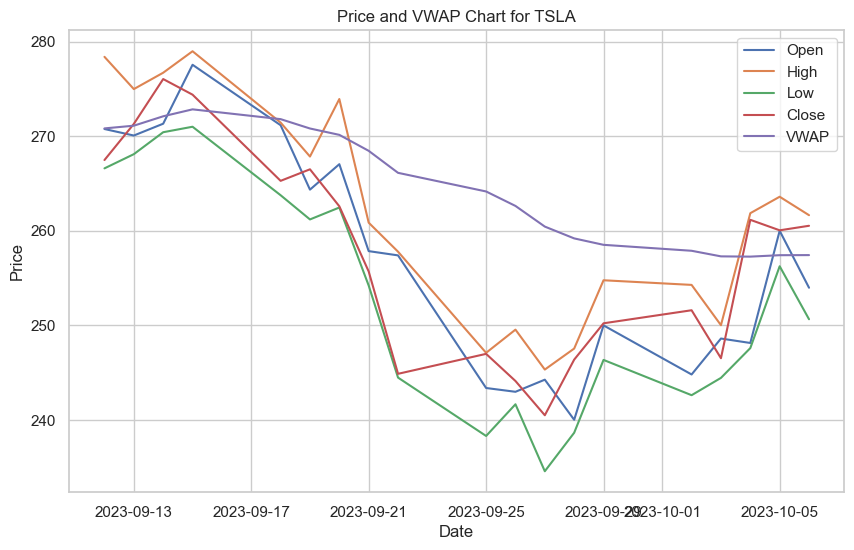

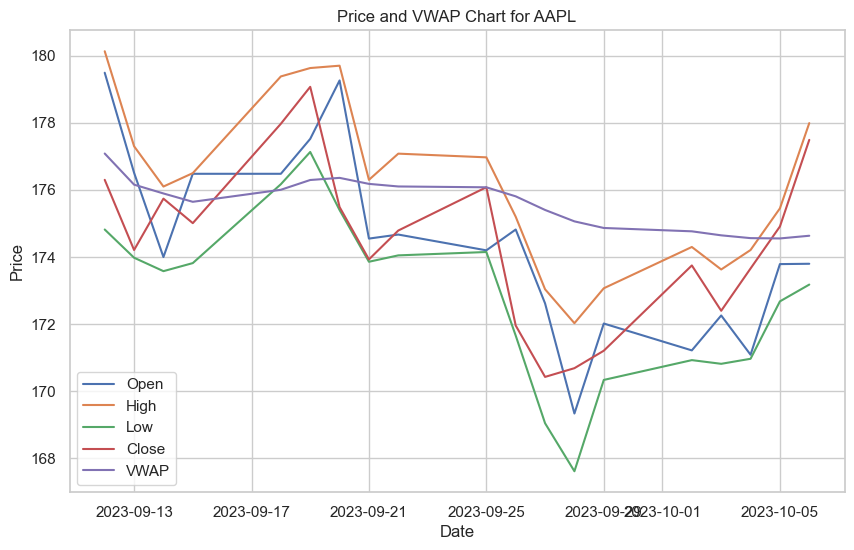

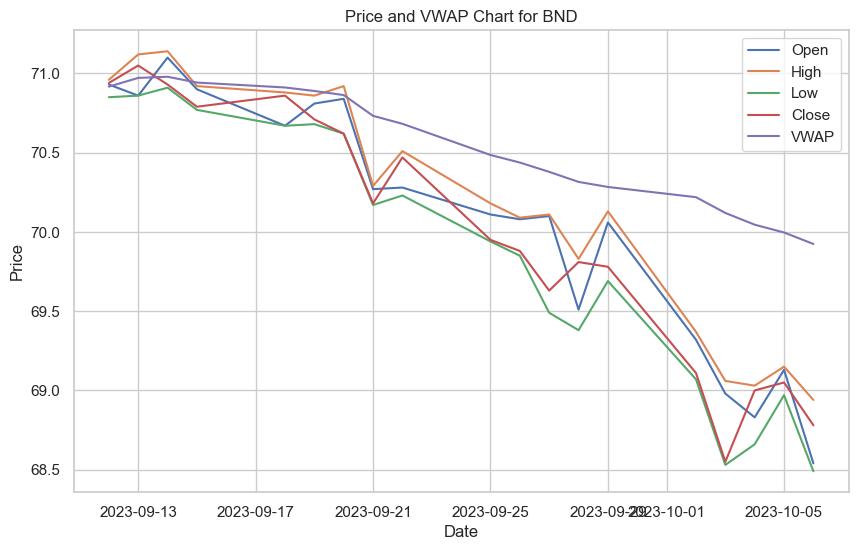

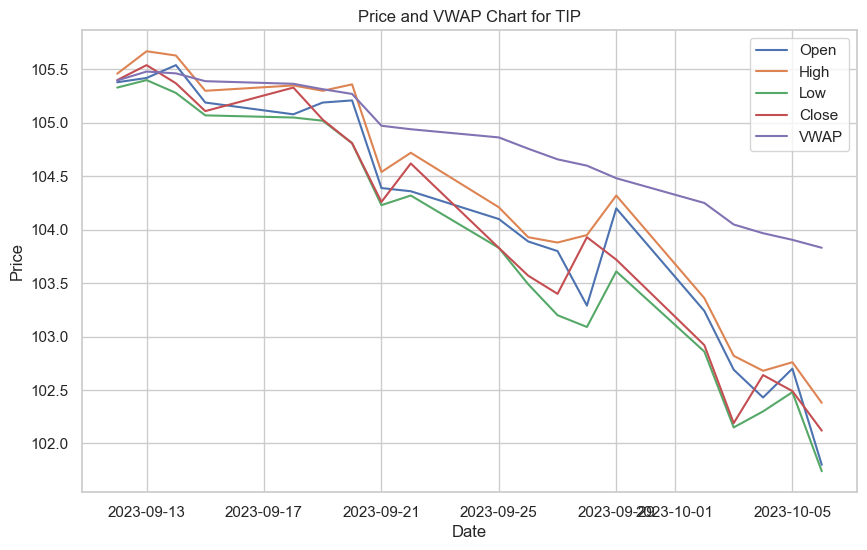

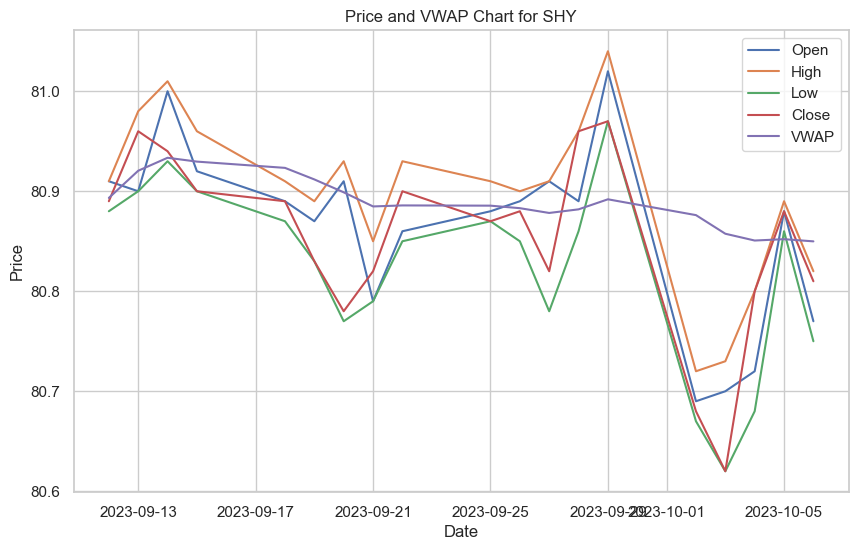

In [39]:
for stock in selected_stocks:
    plt.figure(figsize=(10, 6))
    
    # Create a DataFrame for the selected stock's data
    stock_data = pd.DataFrame({
        'Open': vwap_open[stock],
        'High': vwap_high[stock],
        'Low': vwap_low[stock],
        'Close': vwap_close[stock],
        'VWAP': vwap[stock]
    }, index=vwap.index)
    
    # Plot the data using Seaborn
    sns.lineplot(data=stock_data, dashes=False)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price and VWAP Chart for {stock}')
    plt.legend()
    plt.show()

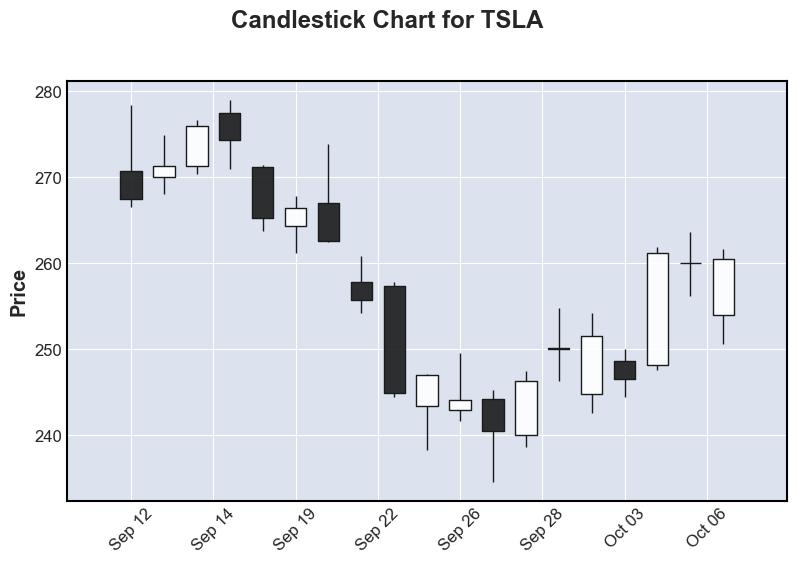

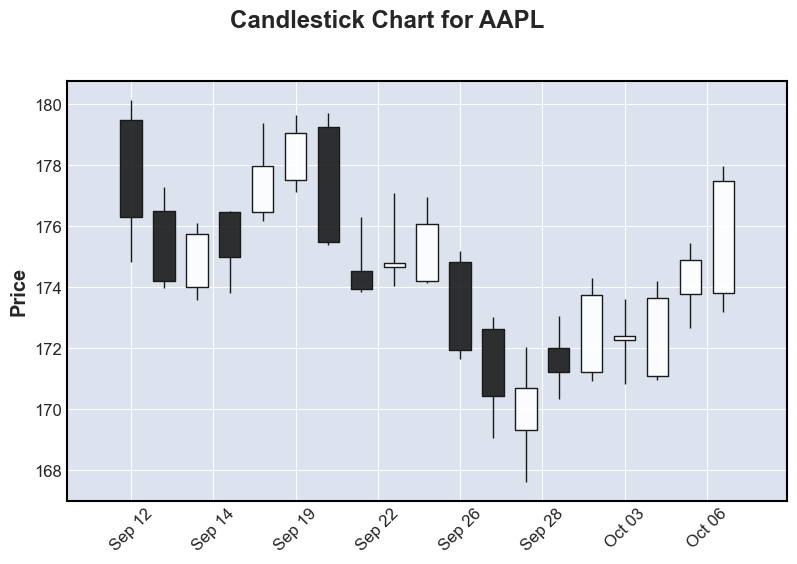

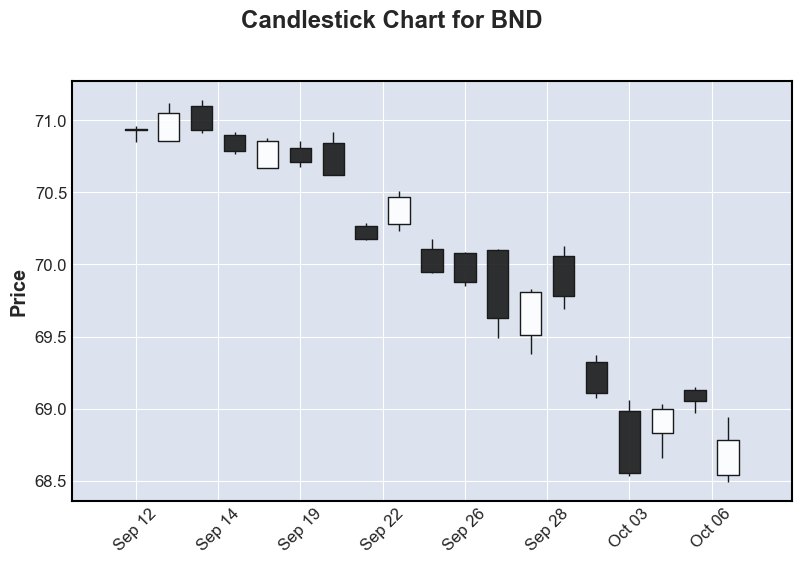

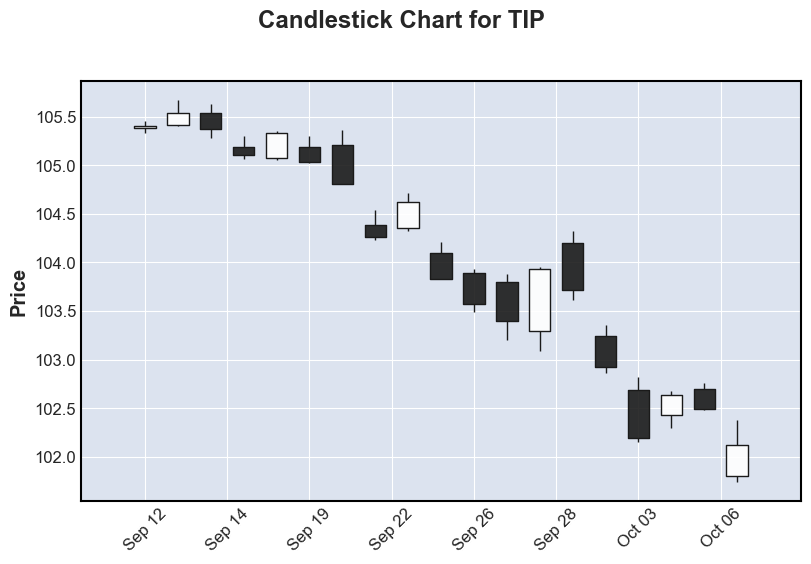

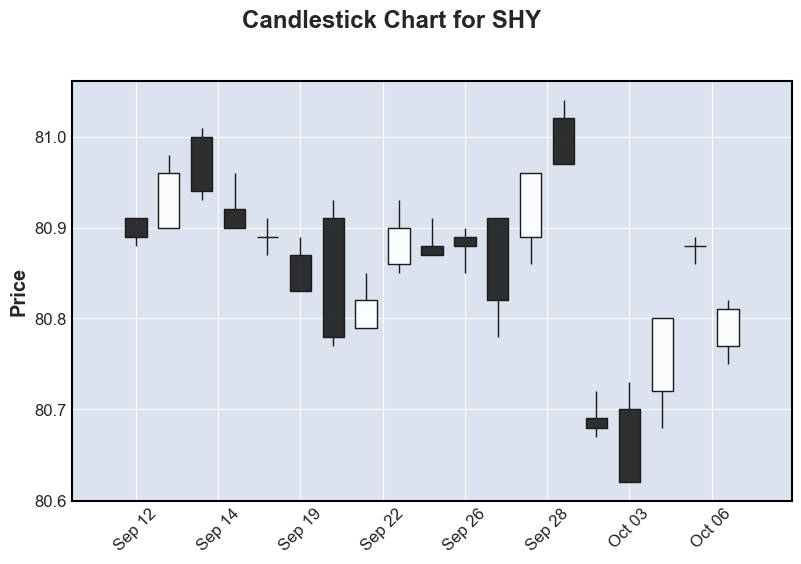

In [40]:
import mplfinance as mpf

# Create individual candlestick charts for each selected stock
for stock in selected_stocks:
    ohlc_data = pd.DataFrame({
        'Open': vwap_open[stock],
        'High': vwap_high[stock],
        'Low': vwap_low[stock],
        'Close': vwap_close[stock]
    }, index=vwap.index)
    
    mpf.plot(ohlc_data, type='candle', title=f'Candlestick Chart for {stock}', ylabel='Price', figsize=(10, 6))
    plt.show()

# Alpha

### Spy benchmark

In [41]:
start_date = '2023-09-12'
end_date = '2023-10-08'
bench = pdr.DataReader('^GSPC', start=start_date, end=end_date)
bench

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-12,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3435740000
2023-09-13,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3529430000
2023-09-14,4487.779785,4511.990234,4478.689941,4505.100098,4505.100098,3648720000
2023-09-15,4497.979980,4497.979980,4447.209961,4450.319824,4450.319824,6932230000
2023-09-18,4445.129883,4466.359863,4442.109863,4453.529785,4453.529785,3161230000
...,...,...,...,...,...,...
2023-10-02,4284.520020,4300.580078,4260.209961,4288.390137,4288.390137,3938660000
2023-10-03,4269.750000,4281.149902,4216.450195,4229.450195,4229.450195,3953830000
2023-10-04,4233.830078,4268.500000,4220.479980,4263.750000,4263.750000,3777600000


In [42]:
# Change
b_start='2014-01-01'
b_end = '2023-10-08'
b_data = pdr.DataReader('^GSPC', start=b_start, end=b_end)
b_data = b_data['Close']
b_df= b_data.resample('Y').last().pct_change()
b_df
b_r = b_df.mean()
b_r
#portfolio['Expected Return'] = e_r.reindex(portfolio['Ticker']).values

[*********************100%%**********************]  1 of 1 completed


0.09643685059760472

In [43]:
#benchmark returns annually
b_df

Date
2014-12-31         NaN
2015-12-31   -0.007266
2016-12-31    0.095350
2017-12-31    0.194200
2018-12-31   -0.062373
2019-12-31    0.288781
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.194428
2023-12-31    0.122151
Freq: A-DEC, Name: Close, dtype: float64

In [44]:
#portfolio returns annual
df_pr = df.mean(axis=1)
df_pr

Date
2014-12-31         NaN
2015-12-31    0.106551
2016-12-31    0.192897
2017-12-31    0.188624
2018-12-31   -0.028624
2019-12-31    0.283677
2020-12-31    0.335464
2021-12-31    0.214318
2022-12-31   -0.207166
2023-12-31    0.176556
Freq: A-DEC, dtype: float64

In [45]:
import statsmodels.api as sm

# Remove rows with NaN values
df = df.dropna()
b_df = b_df.dropna()

# Define the independent variable (benchmark returns)
X = b_df

# Add a constant for the intercept
X = sm.add_constant(X)

# Define the dependent variable (portfolio returns)
Y = df_pr
Y = Y.reindex(X.index)
# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     30.09
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           0.000921
Time:                        00:21:41   Log-Likelihood:                 11.415
No. Observations:                   9   AIC:                            -18.83
Df Residuals:                       7   BIC:                            -18.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0494      0.031      1.614      0.1

In [46]:
#Alpha = (Portfolio Return - Benchmark Return) - Risk-Free Rate
beta = model.params['Close']
beta

0.9421805418266417

In [47]:
alpha = p_e_r - (rf + beta * (b_r - rf))
alpha

0.10431952620128797

# Risk

Earlier we found the covariance matrix of our portfolio, now we will utilize the correlation matrix to find our two most correlated assets

In [48]:
cor_matrix= pivoted.pct_change().apply(lambda x: np.log(1+x)).corr()
cor_matrix

,AAPL,AMD,AMZN,BA,BABA,BKLN,BND,...,TIP,TLT,TSLA,V,VCSH,VZ,XOM
AAPL,1.000000,0.370007,0.555602,0.134171,0.474525,-0.031051,0.014719,...,0.059396,-0.010781,0.214031,0.453201,0.020786,-0.289878,-0.144785
AMD,0.370007,1.000000,0.790020,-0.175710,0.362290,0.304036,0.383757,...,0.488330,0.405677,0.509307,0.598445,0.368327,-0.370968,-0.034792
AMZN,0.555602,0.790020,1.000000,0.047539,0.431221,0.418592,0.223186,...,0.255528,0.260731,0.531864,0.522019,0.179813,-0.355299,-0.107029
BA,0.134171,-0.175710,0.047539,1.000000,0.152855,0.302419,-0.314163,...,-0.450905,-0.340003,0.007384,-0.303833,-0.204284,-0.008640,0.208762
BABA,0.474525,0.362290,0.431221,0.152855,1.000000,0.349866,0.336882,...,0.338134,0.352494,-0.152475,0.150628,0.280395,-0.294711,0.052576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSLA,0.214031,0.509307,0.531864,0.007384,-0.152475,0.590908,0.266762,...,0.215247,0.205756,1.000000,0.227817,0.238521,-0.111946,-0.424513
V,0.453201,0.598445,0.522019,-0.303833,0.150628,-0.030655,0.351257,...,0.419172,0.419032,0.227817,1.000000,0.259318,-0.298137,-0.362501
VCSH,0.020786,0.368327,0.179813,-0.204284,0.280395,0.330910,0.906021,...,0.871455,0.725524,0.238521,0.259318,1.000000,0.293039,-0.234782
VZ,-0.289878,-0.370968,-0.355299,-0.008640,-0.294711,-0.060745,0.215964,...,0.157468,0.139247,-0.111946,-0.298137,0.293039,1.000000,0.137659


In [49]:
# Calculate the absolute value of the correlation matrix
abs_corr_matrix = cor_matrix.abs()

# Create a sorted list of correlations
sorted_corr = abs_corr_matrix.unstack().sort_values(ascending=False)

# Filter out correlations with oneself (correlation equals 1.0)
filtered_corr = sorted_corr[sorted_corr < 1.0]

# Identify the most correlated stocks
filtered_corr.head(10)

TIP   SCHP    0.997257
SCHP  TIP     0.997257
BND   IEF     0.986110
IEF   BND     0.986110
LQD   BND     0.976312
BND   LQD     0.976312
      SCHP    0.949965
SCHP  BND     0.949965
IEF   LQD     0.946847
LQD   IEF     0.946847
dtype: float64

THe bonds tend to have high correlation with each other which is understandable because they are in the same industry. One correlation that actually is quite peculiar to me is JPM and GE

[                       0%%                      ]

[*********************100%%**********************]  40 of 40 completed


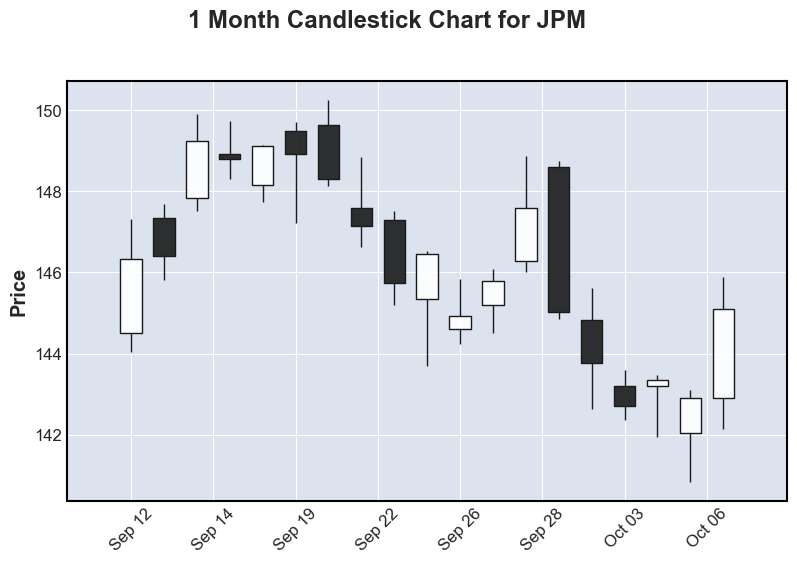

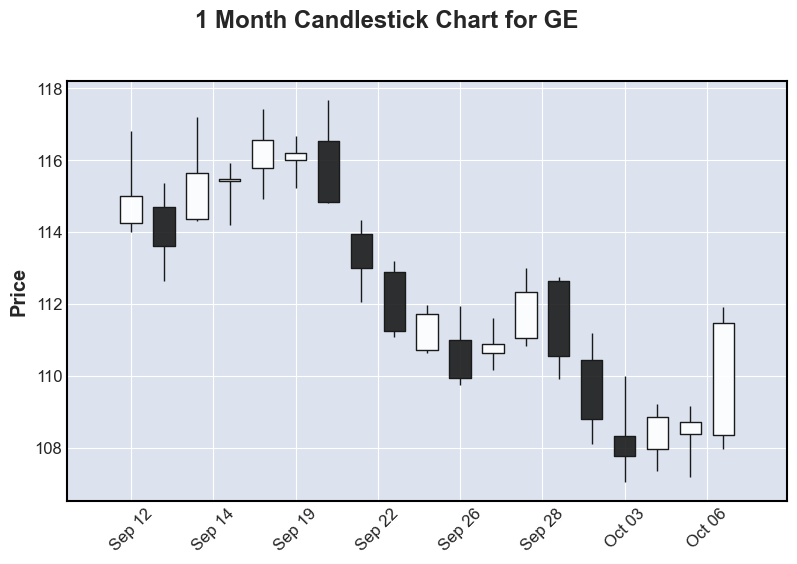

In [50]:
# Setup year correlation
start_date2 = '2022-10-25'
end_date2 = '2023-10-25'
data2 = pdr.DataReader(tickers, start=start_date2, end=end_date2)
vwap_low2 = data2['Low']
vwap_high2 = data2['High']
vwap_open2 = data2['Open']
vwap_close2 = data2['Close']

correy = ['JPM', 'GE']
# Create individual candlestick charts for each selected stock
for stock in correy:
    ohlc_data2 = pd.DataFrame({
        'Open': vwap_open2[stock],
        'High': vwap_high2[stock],
        'Low': vwap_low2[stock],
        'Close': vwap_close2[stock]
    }, index=vwap.index)
    
    mpf.plot(ohlc_data2, type='candle', title=f'1 Month Candlestick Chart for {stock}', ylabel='Price', figsize=(10, 6))
    plt.show()

[*********************100%%**********************]  40 of 40 completed


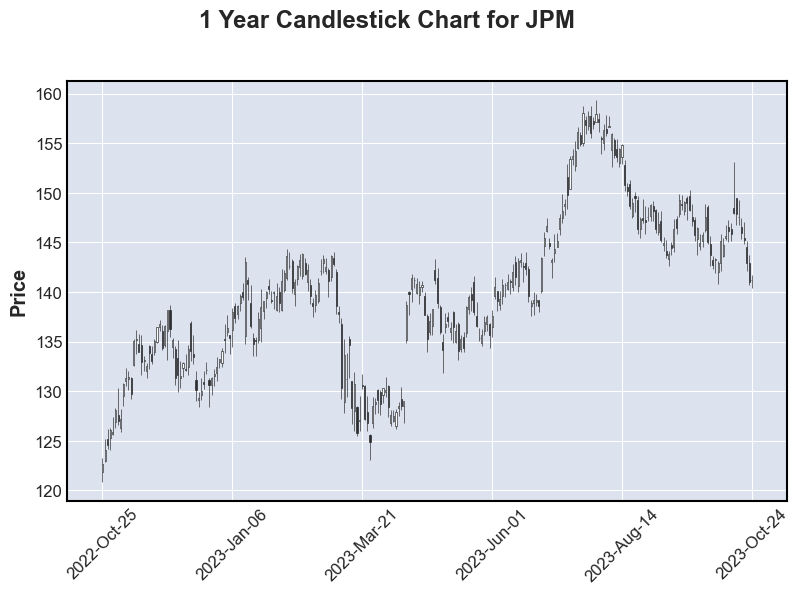

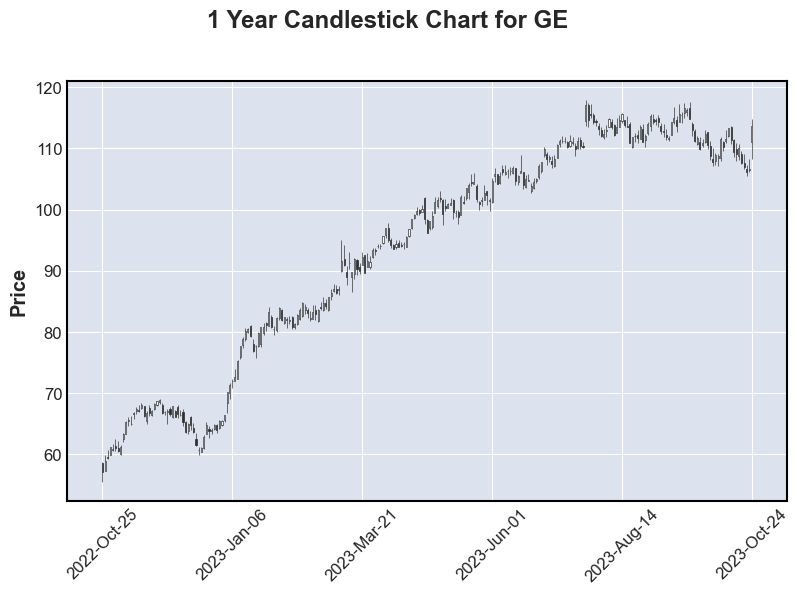

In [51]:
# Setup year correlation
start_date2 = '2022-10-25'
end_date2 = '2023-10-25'
data2 = pdr.DataReader(tickers, start=start_date2, end=end_date2)
vwap_low2 = data2['Low']
vwap_high2 = data2['High']
vwap_open2 = data2['Open']
vwap_close2 = data2['Close']

correy = ['JPM', 'GE']
# Create individual candlestick charts for each selected stock
for stock in correy:
    ohlc_data2 = pd.DataFrame({
        'Open': vwap_open2[stock],
        'High': vwap_high2[stock],
        'Low': vwap_low2[stock],
        'Close': vwap_close2[stock]
    }, index=data2.index)
    
    mpf.plot(ohlc_data2, type='candle', title=f'1 Year Candlestick Chart for {stock}', ylabel='Price', figsize=(10, 6))
    plt.show()

While looking at my graphs of expected return vs volatity we can asses that the JPM stock is both stronger in returns and less in volatility overall. They have similar sharpe ratios. Thus I would go with long on JPM and shorting GE for the underlying of the assets. 

# Black-Shcoles Call Option



In [52]:
data2['Open']['JPM'][250]

141.19000244140625

In [53]:
sd_ret['JPM']

0.009635373816181096

In [54]:
import math
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + (sigma**2) / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price


#Option price for JPM
# Example Usage
S = data2['Open']['JPM'][250]  # Current stock price
K = 150  # Option strike price
T = 1  # Time to expiration (in years)
r = rf  # Risk-free interest rate
sigma = sd_ret['JPM']  # Volatility (annualized)
call_price = black_scholes_call(S, K, T, r, sigma)
print(f"Black-Scholes Call Option Price: {call_price:.2f}")

Black-Scholes Call Option Price: 0.23


# Kalman Filter

In [55]:
from pykalman import KalmanFilter


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical stock data for NVIDIA (NVDA)
stock_symbol = 'NVDA'
start_date = '2023-10-23'
end_date = '2023-10-27'
Fdata = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)
Fdata = Fdata[['Close']]
Fdata.head()


,Close
Date,
2023-10-23,429.750000
2023-10-24,436.630005
2023-10-25,417.790009
2023-10-26,403.260010


[*********************100%%**********************]  1 of 1 completed

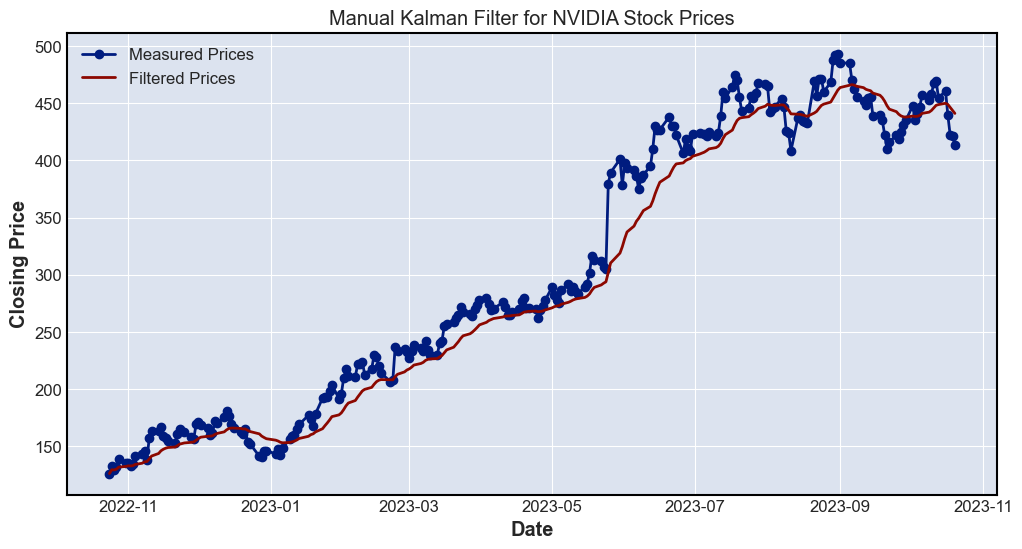

In [57]:
# Download historical stock data for NVIDIA (NVDA)
stock_symbol = 'NVDA'
start_date = '2022-10-23'
end_date = '2023-10-23'
Ndata = yf.download(stock_symbol, start=start_date, end=end_date)
measurements = Ndata['Close'].values

# Kalman filter parameters
initial_state_mean = measurements[0]
initial_state_covariance = 1
observation_covariance = 1
transition_covariance = 0.01

# Kalman filter initialization
state_mean = initial_state_mean
state_covariance = initial_state_covariance

# Lists to store filtered means and covariances
filtered_state_means = [state_mean]
filtered_state_covariances = [state_covariance]

# Apply Kalman filter to the data
for measurement in measurements[1:]:
    # Prediction step
    state_mean = state_mean
    state_covariance += transition_covariance
    
    # Update step
    kalman_gain = state_covariance / (state_covariance + observation_covariance)
    state_mean += kalman_gain * (measurement - state_mean)
    state_covariance *= (1 - kalman_gain)
    
    # Save filtered mean and covariance
    filtered_state_means.append(state_mean)
    filtered_state_covariances.append(state_covariance)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(Ndata.index, measurements, label='Measured Prices', marker='o', linestyle='-', color='b')
plt.plot(Ndata.index, filtered_state_means, label='Filtered Prices', linestyle='-', color='r')
plt.title('Manual Kalman Filter for NVIDIA Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [58]:
# Predict the next 4 days using the manual Kalman filter
future_days = 4
predicted_prices_manual = [state_mean]
for _ in range(future_days):
    # Prediction step for future days
    state_mean = state_mean
    state_covariance += transition_covariance
    
    # Save predicted mean
    predicted_prices_manual.append(state_mean)


# Extend the data index for future days
future_index_manual = pd.date_range(Ndata.index[-1], periods=future_days + 1, freq='B')[1:]
predicted_prices_manual_df = pd.Series(predicted_prices_manual[:-1], index=future_index_manual)

# Print the predicted prices
predicted_prices_manual_df



2023-10-23    441.176837
2023-10-24    441.176837
2023-10-25    441.176837
2023-10-26    441.176837
Freq: B, dtype: float64

[*********************100%%**********************]  1 of 1 completed


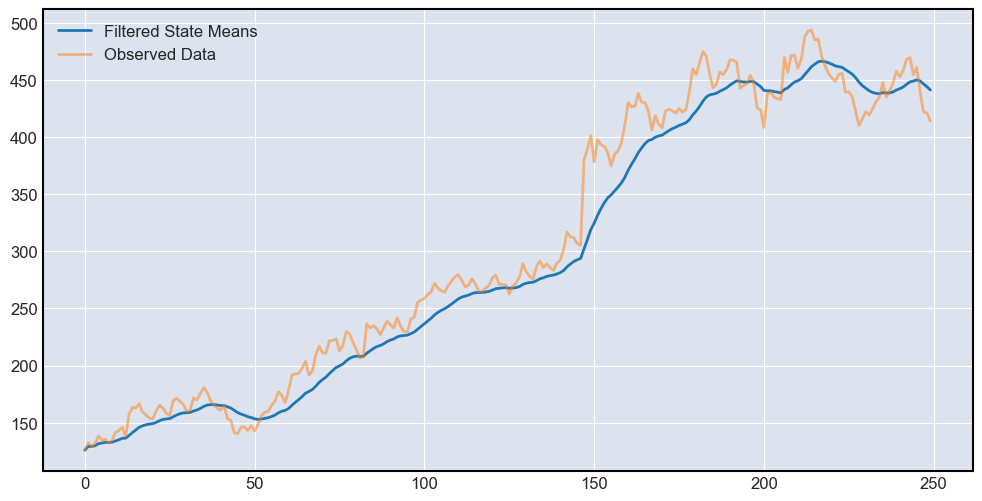

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical stock data for NVIDIA (NVDA)
stock_symbol = 'NVDA'
start_date = '2022-10-23'
end_date = '2023-10-23'
Ndata = yf.download(stock_symbol, start=start_date, end=end_date)
measurements = Ndata['Close'].values

# Kalman filter parameters
initial_state_mean = measurements[0]
initial_state_covariance = 1
observation_covariance = 1
transition_covariance = 0.01

# Kalman filter initialization
state_mean = initial_state_mean
state_covariance = initial_state_covariance

# Lists to store filtered means and covariances
filtered_state_means = [state_mean]
filtered_state_covariances = [state_covariance]

# Apply Kalman filter to the data
for measurement in measurements[1:]:
    # Prediction step
    state_mean = state_mean
    state_covariance += transition_covariance
    
    # Update step
    kalman_gain = state_covariance / (state_covariance + observation_covariance)
    state_mean += kalman_gain * (measurement - state_mean)
    state_covariance *= (1 - kalman_gain)
    
    # Save filtered mean and covariance
    filtered_state_means.append(state_mean)
    filtered_state_covariances.append(state_covariance)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(filtered_state_means, label='Filtered State Means')
plt.plot(measurements, label='Observed Data', alpha=0.5)
plt.legend()
plt.show()


# ARCH & GARCH

[*********************100%%**********************]  1 of 1 completed


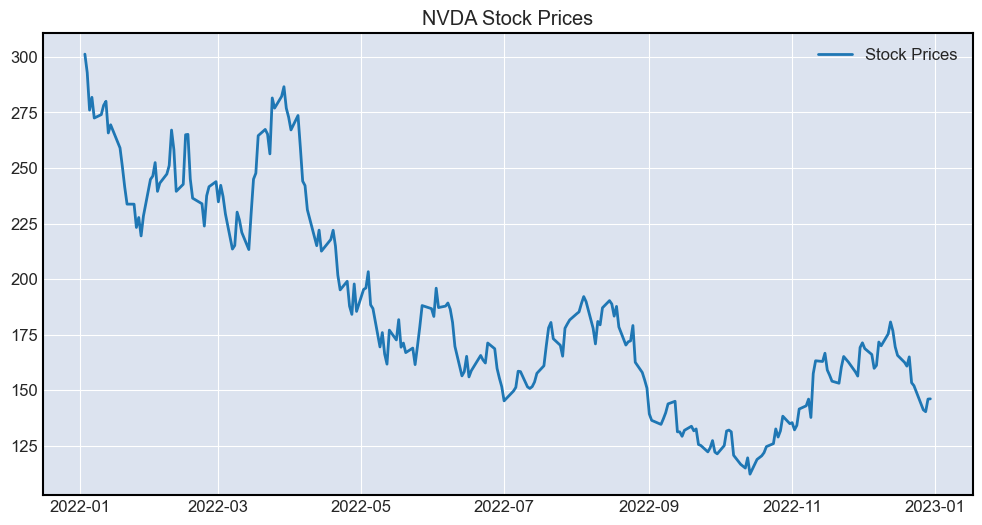

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7385.497783569026
Iteration:      2,   Func. Count:     16,   Neg. LLF: 470.93568182471785
Iteration:      3,   Func. Count:     25,   Neg. LLF: -449.2196347152163
Iteration:      4,   Func. Count:     31,   Neg. LLF: -451.52032018501893
Iteration:      5,   Func. Count:     36,   Neg. LLF: -451.49071608091543
Iteration:      6,   Func. Count:     42,   Neg. LLF: -451.52909428818003
Iteration:      7,   Func. Count:     47,   Neg. LLF: -451.5289687852963
Iteration:      8,   Func. Count:     53,   Neg. LLF: -451.52917810219276
Optimization terminated successfully    (Exit mode 0)
            Current function value: -451.52927216476155
            Iterations: 8
            Function evaluations: 63
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R

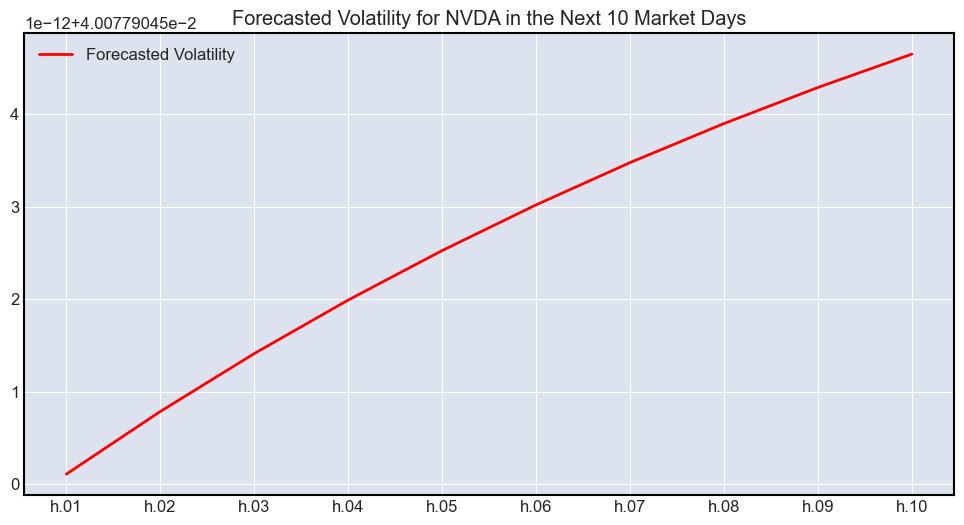

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model

# Download historical stock data for NVIDIA (NVDA)
stock_symbol = 'NVDA'
start_date = '2022-01-01'
end_date = '2023-01-01'

data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
returns = data['Close'].pct_change().dropna()

# Plot the stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Stock Prices')
plt.title(f'{stock_symbol} Stock Prices')
plt.legend()
plt.show()

# Apply ARCH(1)/GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit()

# Display model summary
print(results.summary())

# Forecast future volatility
forecast_horizon = 10
forecast = results.forecast(horizon=forecast_horizon)

# Plot the forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(np.sqrt(forecast.variance.dropna().iloc[-1, :]), label='Forecasted Volatility', color='red')
plt.title(f'Forecasted Volatility for {stock_symbol} in the Next 10 Market Days')
plt.legend()
plt.show()


# ML Clustering

In [61]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import pandas_datareader as dr

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

In [62]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = pivoted.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = pivoted.pct_change().std() * np.sqrt(252)
data=returns
#format the data as a numpy array to feed into the K-Means algorithm
#data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(2)
X=rescaledDataset
X.head(2)

,Returns,Volatility
AAPL,1.136577,-0.015032
AMD,1.537405,2.526591


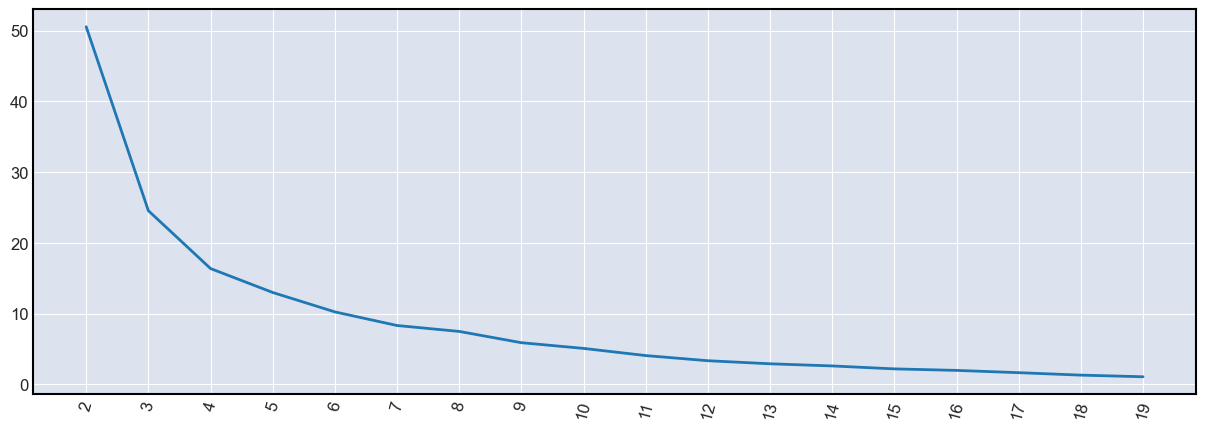

In [64]:
### K-Means
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

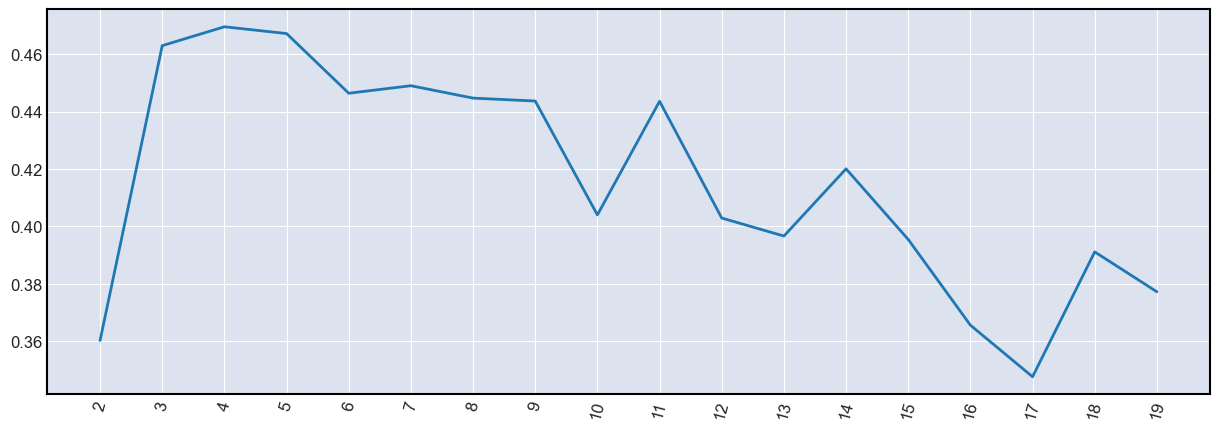

In [65]:
from sklearn.cluster import KMeans
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(X)        
    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)


In [66]:
# CHose 4 CLusters

nclust=4
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=4)

In [67]:
#Extracting labels 
target_labels = k_means.predict(X)

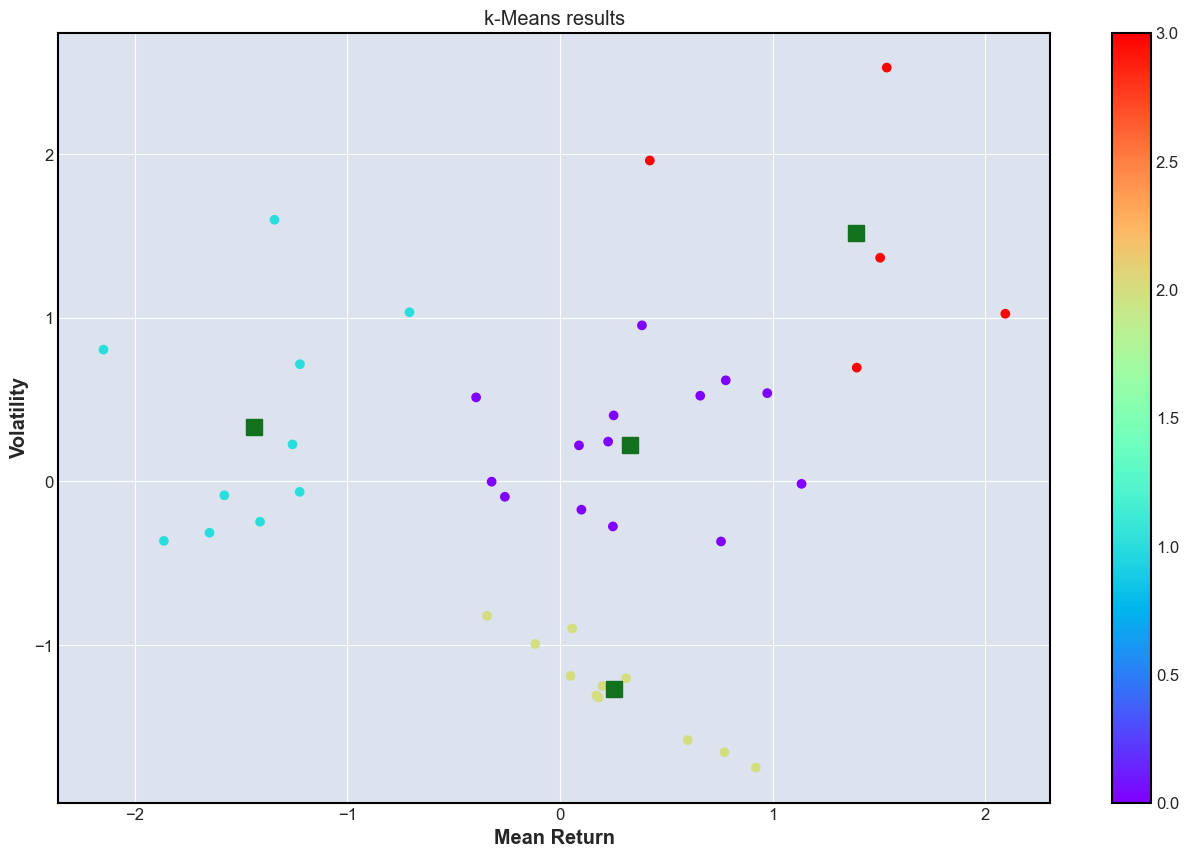

In [68]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

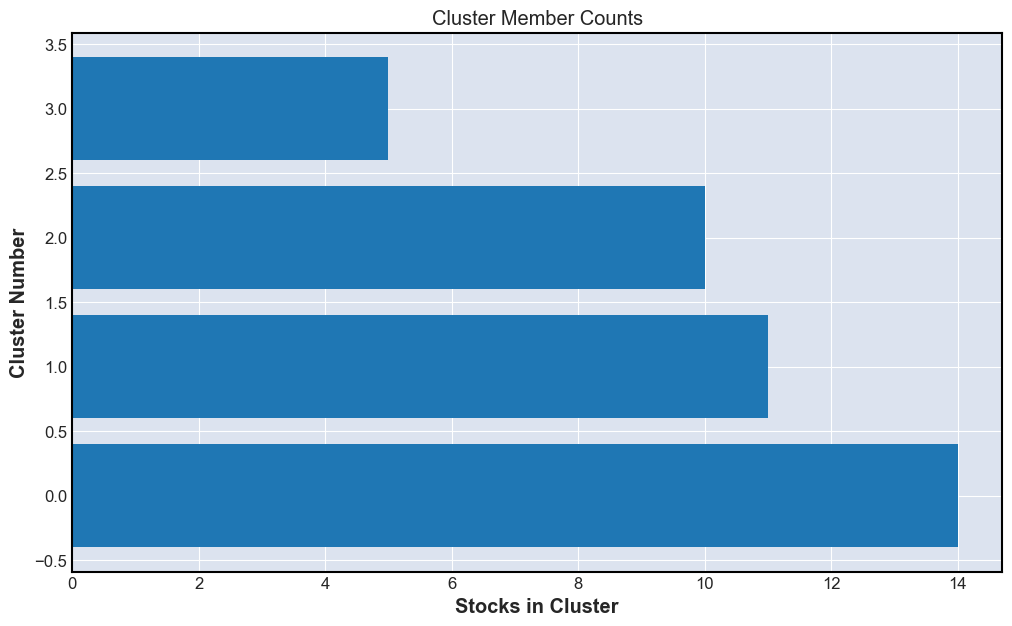

In [69]:
# show number of stocks in each cluster
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series.value_counts())), # cluster labels, y axis
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#Calulate linkage
Z= linkage(X, method='ward')
Z[0]

array([3.000000e+01, 3.300000e+01, 1.701833e-02, 2.000000e+00])

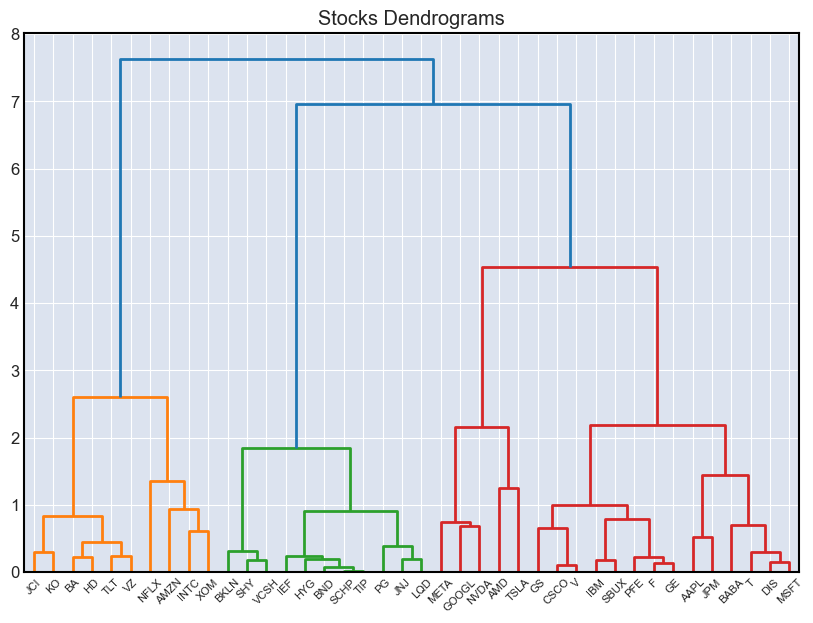

In [71]:
#Plot Dendogram
plt.figure(figsize=(10, 7))
plt.title("Stocks Dendrograms")
dendrogram(Z,labels = X.index)
plt.show()

In [72]:
distance_threshold = 13
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters['cluster'].unique()

array([1])

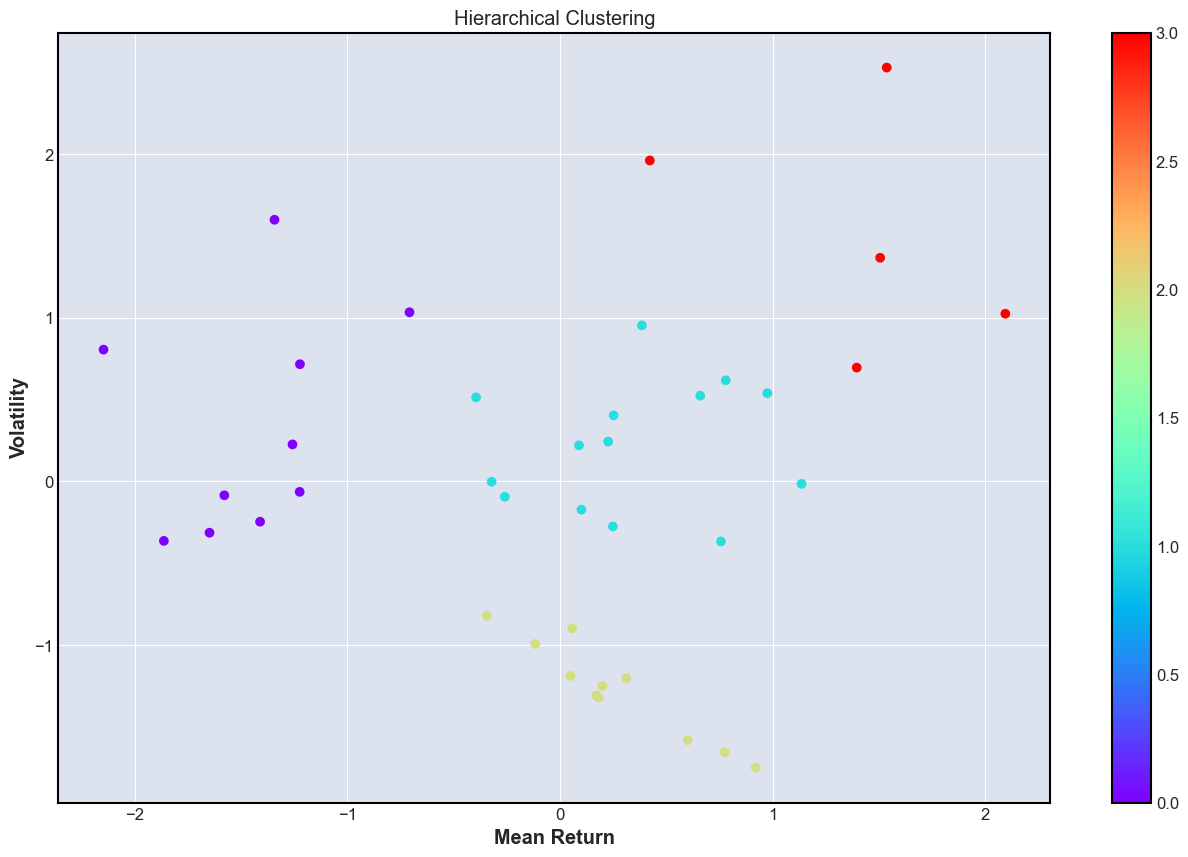

In [73]:
nclust = 4
hc = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = hc.fit_predict(X)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

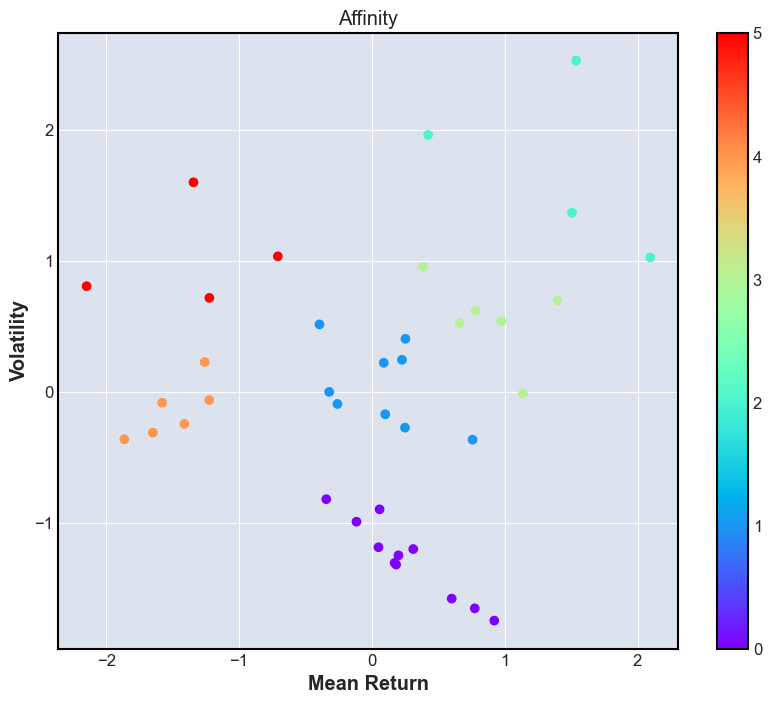

In [74]:
ap = AffinityPropagation()
ap.fit(X)
clust_labels2 = ap.predict(X)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

Estimated number of clusters: 6


<Figure size 640x480 with 0 Axes>

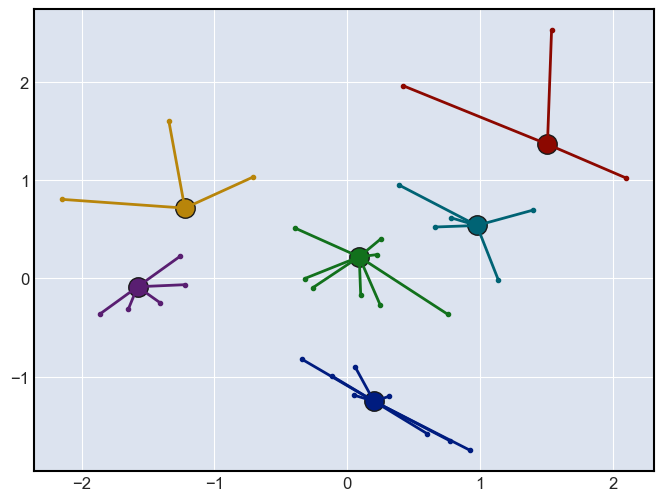

In [75]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
no_clusters = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

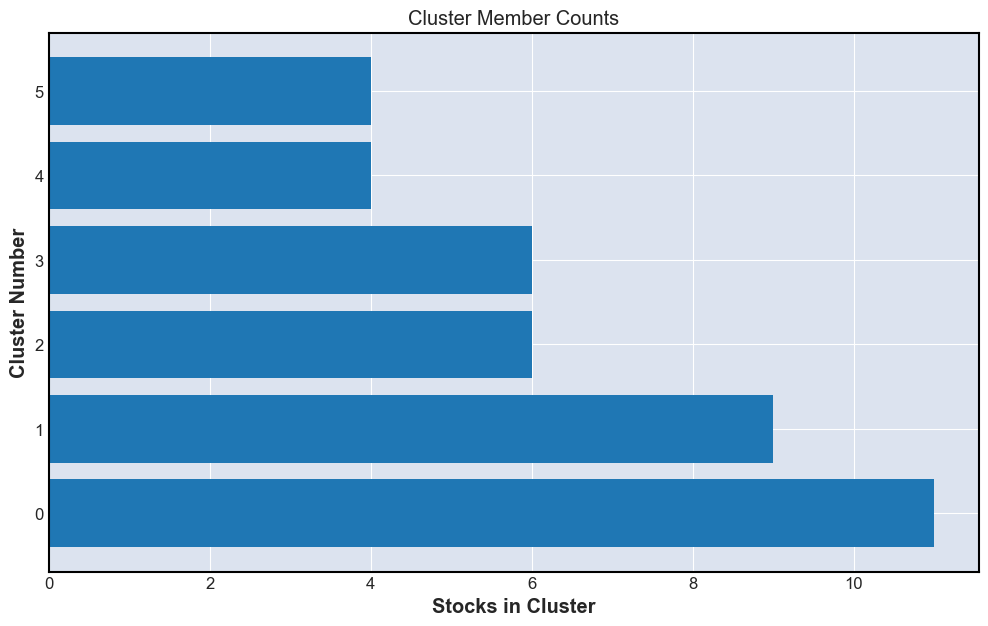

In [76]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series_ap.value_counts())), # cluster labels, y axis
    clustered_series_ap.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [77]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.46960496908860055
hc 0.46960496908860055
ap 0.44101428129853026


In [78]:
# all stock with its cluster label (including -1)
clustered_series = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
clustered_series = clustered_series[clustered_series != -1]
# get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<25) & (counts>1)].index)[::-1]
cluster_vis_list

CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

# plot a handful of the smallest clusters
plt.figure(figsize=(12,7))
cluster_vis_list[0:min(len(cluster_vis_list), 4)]



Clusters formed: 6
Pairs to evaluate: 266


[5, 2, 4, 3]

<Figure size 1200x700 with 0 Axes>

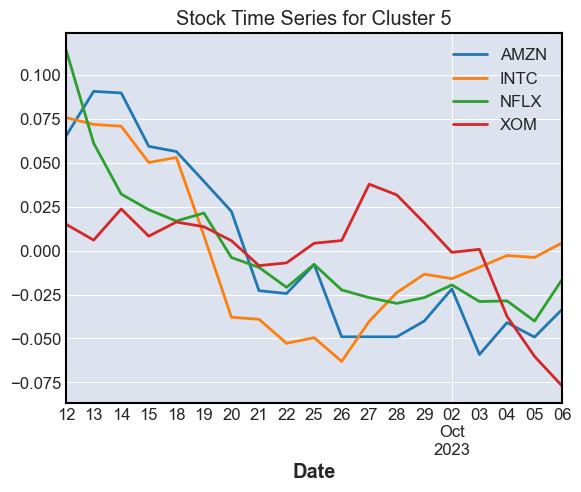

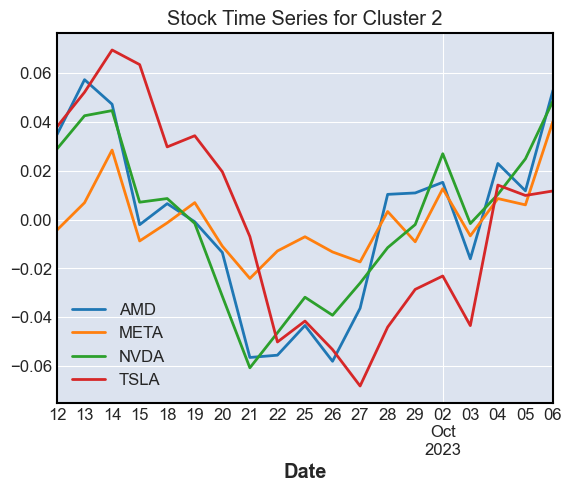

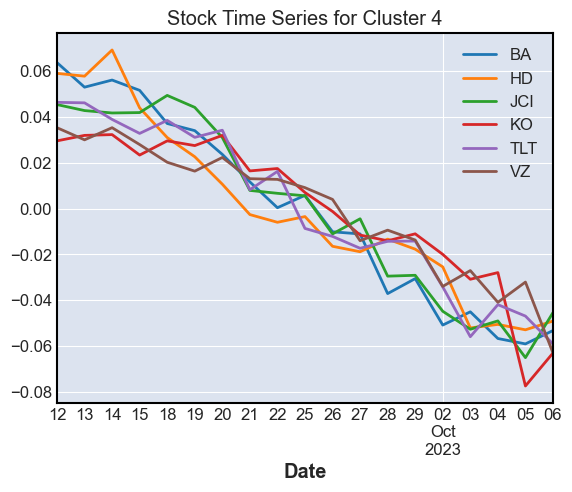

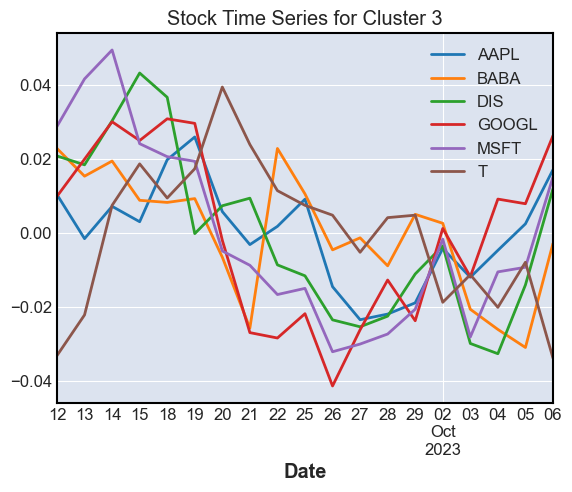

In [79]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(pivoted.loc[:"2023-12-09", tickers].mean())
    data = np.log(pivoted.loc[:"2023-12-09", tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)
plt.show()

In [80]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs




from statsmodels.tsa.stattools import coint
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index   
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        pivoted[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs


pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

print ("Number of pairs found : %d" % len(pairs))
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))




Number of pairs found : 6
In those pairs, there are 11 unique tickers.


In [81]:
pairs


[('BKLN', 'HYG'),
 ('AAPL', 'DIS'),
 ('AAPL', 'T'),
 ('BA', 'TLT'),
 ('AMD', 'NVDA'),
 ('AMZN', 'XOM')]

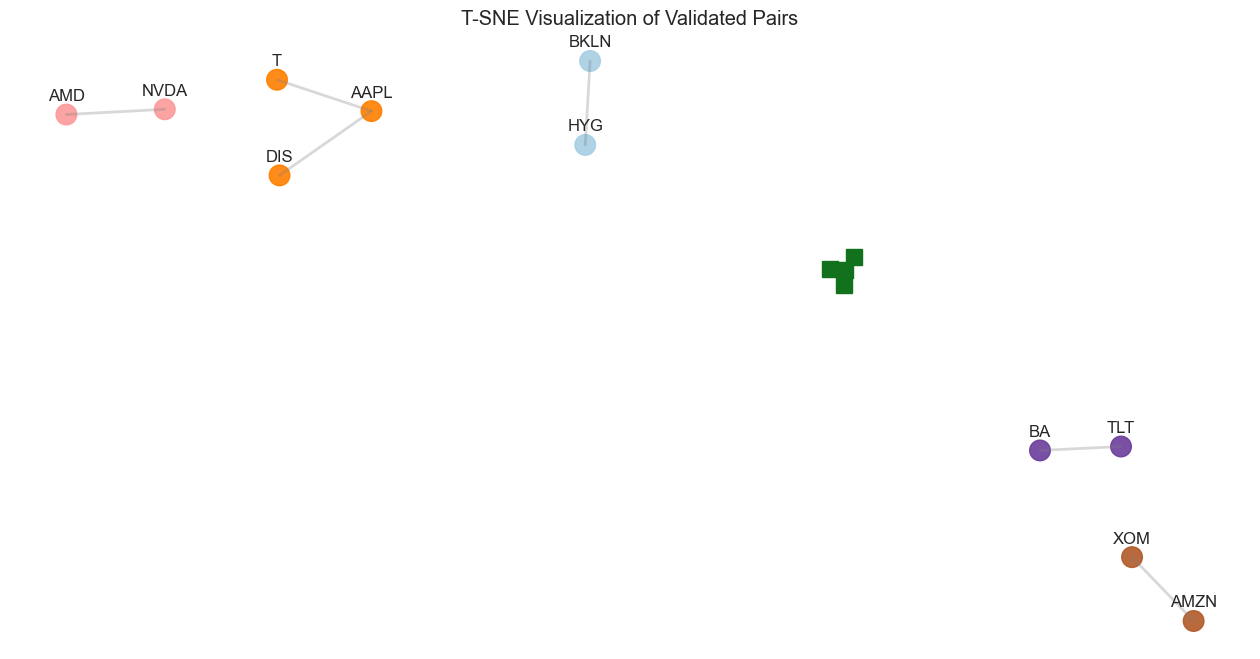

In [82]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]
X_tsne = TSNE(learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)
plt.figure(1, facecolor='white',figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    #print(pair[0])
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    #print(ticker1, loc1)

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
      
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs'); 

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

The clustering techniques do not directly help in stock trend prediction. However, they can be effectively used in portfolio construction for finding the right pairs, which eventually help in risk mitigation and one can achieve superior risk adjusted returns. These thus show my strongest pairs

# Bayes Volatility Forecast

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


[*********************100%%**********************]  1 of 1 completed


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [y_sigma, Intercept, x]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 168 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


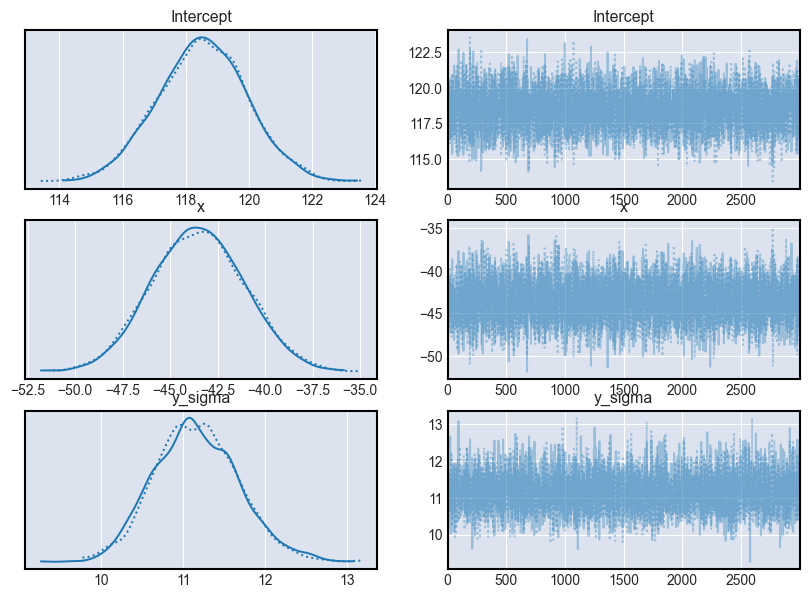

In [83]:
import pandas_datareader as pdr
import bambi as bmb
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)

baba_data = yf.download('BABA', start=start_date, end=end_date)['Close']

# Assuming 'x' is your time variable and 'y' is the stock price
size = len(baba_data)
x = np.linspace(0, 1, size)

# Assuming baba_data is the stock price data
data = pd.DataFrame({'x': x, 'y': baba_data.values})

# Define the model using Bambi
model = bmb.Model("y ~ x", data)

# Fit the model
idata = model.fit(draws=3000, cores=1)

# Plot trace plot
az.plot_trace(idata, figsize=(10, 7))
plt.show()



The scatter plot method provides a visual snapshot of the relationship between expected return and volatility in a portfolio, offering a quick and intuitive overview. It is particularly useful for initial exploration and communication. On the other hand, Bayesian volatility forecasting, involving the use of statistical models, captures underlying relationships explicitly, providing uncertainty estimates through the posterior distribution. This method is advantageous for a more rigorous and quantitative analysis, especially when detailed insights into the statistical nature of the data are essential. 

# Monte Carlo

In [84]:
# Define the ticker symbol
ticker_symbol = "TSLA"

# Download historical data as a pandas DataFrame
tesdf = yf.download(ticker_symbol, start="2022-01-01", end="2023-01-01")

# Calculate daily returns
tesdf['return'] = tesdf['Adj Close'].pct_change().fillna(0)

# Display the DataFrame
print(tesdf.head())


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume    return  
Date                             
2022-01-03  103931400  0.000000  
2022-01-04  100248300 -0.041833  
2022-01-05   80119800 -0.053471  
2022-01-06   90336600 -0.021523  
2022-01-07   84164700 -0.035447  


In [87]:
import pandas_montecarlo
mc = tesdf['return'].montecarlo(sims=10, bust=-0.1, goal=1)

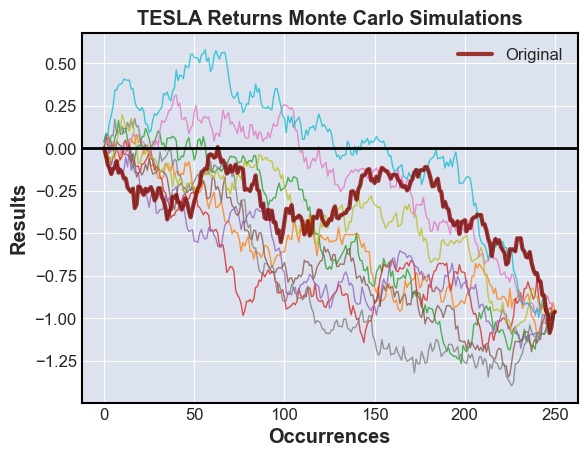

In [88]:
mc.plot(title="TESLA Returns Monte Carlo Simulations")  # optional: , figsize=(x, y)

In [89]:
print(mc.stats)

{'min': -0.9618745436236231, 'max': -0.9618745436236223, 'mean': -0.9618745436236227, 'median': -0.9618745436236227, 'std': 2.482534153247273e-16, 'maxdd': -1.397936881194631, 'bust': 1.0, 'goal': 0.0}


In [90]:
print(mc.maxdd)

{'min': -1.397936881194631, 'max': -0.98882573663793, 'mean': -1.16484787747735, 'median': -1.1378277850551828, 'std': 0.13640757193799918}


In [ ]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S*bs_call(S,K,T,r,sigma)

In [104]:
from pandas_datareader import data as pdr
from math import log, sqrt, pi, exp
expiry = '01-01-2024'
strike_price_call = 60
strike_price_put = 70

one_year_ago = today.replace(year=today.year-1)

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)


mc_sims = 50 
mc_bust = -.4
mc_goal = 1
today = datetime(2023,12,5)
sigma = np.sqrt(252) * mc.stats['std']
uty = (pdr.get_data_yahoo("TSLA", start=today.replace(day=today.day-3), end=today)['Close'].iloc[-1])/100

def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S*bs_call(S,K,T,r,sigma)
# lcp
lcp = tesdf['Close'].iloc[-1]

t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365
print('t: ' , t)

[*********************100%%**********************]  1 of 1 completed
t:  0.049315068493150684


In [106]:
print('CALL: ', round(bs_call(lcp, strike_price_call, t, uty, sigma),4))
print('PUT: ', round(bs_put(lcp, strike_price_put, t, uty, sigma),4))

CALL:  69.7609
PUT:  -7434.1331


The General trend with my options pricing is that Tesla has been trending down so generally their put would already have a lot of premium. 